<hr style="border: 2px solid green;" />

## Комментарий ревьювера

Максим, привет! 

🤚Меня зовут, Олег Юрьев, я буду проверять твой проект. Если не против, я буду обращаться к тебе на _ТЫ_ . Если это неприемлемо, обязательно напиши мне в комментариях - мы прейдем на _ВЫ_ .

🤝Спасибо, что сдал проект вовремя. Тобой проделана большая работа, молодец! 

Пока работа выяглядит отлично. Жаль, что появилась [ошибка](#10-bullet)

✏️В этой тетрадке ты найдешь мои комментарии.

Комментарии будут выделены:

<div style="border:solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
    Безупречная работа</div>       
<br>
<div style="border:solid orange 2px; padding: 20px"> <b>Что можно улучшить</b><br>
    Ничего дорабатывать не надо, данные пункты работают нормально, но есть способы улучшить. Несколько таких комментариев допустимы, но более - придется некоторые доработать. Большое кол-во мелких замечаний и помарок сказываются на общем впечатлении от работы.</div>   
<br>
<div style="border:solid red 2px; padding: 20px"> <b>Что необходимо доработать</b><br>
    Такие пункты необходимо исправить в первую очередь, чтобы я смог принять проект.</div>
 
Не удаляй комментарии, так будем следить за динамикой 📈
   
Давай будем в диалоге - основные цели в диалоге:
- обмен опытом (да я тоже учусь у студентов👨‍🎓)
- выполнить проект еще лучше
- помочь тебе стать аналитиком

Поэтому чтобы мне проще было проверять повторно, а тебе контролировать процесс ревью, оставляй свои комментарии и выделяй их. 
    
<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Например, вот так.</div>
   
Поехали! :)

<hr style="border: 2px solid green;" />

### Описание проекта
##### Вас пригласили на стажировку в отдел аналитики Яндекс.Афиши. Первое задание: помочь маркетологам оптимизировать маркетинговые затраты.
*У вас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года: лог сервера с данными о посещениях сайта Яндекс.Афиши,
*выгрузка всех заказов за этот период,
 статистика рекламных расходов.
 Вы изучите:
**как люди пользуются продуктом,
**когда они начинают покупать,
**сколько денег приносит каждый клиент
**когда клиент окупается.


### Описание данных
#### Таблица visits (лог сервера с информацией о посещениях сайта):
Uid — уникальный идентификатор пользователя
Device — категория устройства пользователя
Start Ts — дата и время начала сессии
End Ts — дата и время окончания сессии
Source Id — идентификатор рекламного источника, из которого пришел пользователь
#### Таблица orders (информация о заказах):
Uid — уникальный id пользователя, который сделал заказ
Buy Ts — дата и время заказа
Revenue — выручка Яндекс.Афиши с этого заказа
#### Таблица costs (информация о затратах на маркетинг):
source_id — идентификатор рекламного источника
dt — дата
costs — затраты на этот рекламный источник в этот день

### Шаг 1. Загрузка данных и подготовка датасетов к анализу

In [1]:
# Импортируем необходимые библиотеки 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,8) 
plt.style.use('ggplot') 
import seaborn as sns
import scipy as sp
import scipy.stats as stats
from scipy import stats as st

    Прочитаем данные, посмотрим на их описательные характеристики и проведем предобработку 

In [2]:
# Сохраним датасеты в одноименные переменные
visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_log.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_log.csv')
costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs.csv')

In [3]:
# Выведем описательные характеристики данных и первые 5 строк 3-х датасетов с данными о пользовательских логах сайта Яндекс.Афиша

In [4]:
visits.info()
display(visits.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
orders.info()
display(orders.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [6]:
costs.info()
display(costs.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


    На этапе предварительной экспертизы данных выявляем следующие проблемы: 1) Кросс-литерация в названиях переменных датасетов visits и orders (может привести к проблемам последующей группировки и итерировании по значениям переменных), 2) Отсутствие нативной интерпретации названий колонок переменных, например Buy ts и dt, обозначающих дату и время совершения покупки (транзакции) и дату оплаты трафика привлечения пользователей (ресурса), соответственно. 3) Неверное приведение типов некоторых переменных: во всех трех датасетах эта проблема касается времени - стандартная ошибка считывания данных сервисов, предоставляющих мониторинг пользовательской активности - время считано в качестве стринговой переменной. (Google Analyst, Яндекс.Метрика).  

In [7]:
# Проверим наличие дубликатов в данных: их нет.

In [8]:
visits.duplicated().sum()
orders.duplicated().sum()
costs.duplicated().sum()

0

In [9]:
# Посмотрим на статистику некоторых значений датасетов, для того, чтобы оценить меру изменчивости признака

In [10]:
# Обратим внимание на первую и последнюю дату пользовательской активности на сайте Яндекс.Афиша
visits['Start Ts'].max()

'2018-05-31 23:59:00'

In [11]:
visits['Start Ts'].min()

'2017-06-01 00:01:00'

In [12]:
orders['Buy Ts'].max()

'2018-06-01 00:02:00'

In [13]:
orders['Buy Ts'].min()

'2017-06-01 00:10:00'

In [14]:
costs['dt'].min()

'2017-06-01'

In [15]:
costs['dt'].max()

'2018-05-31'

    Итак, данные о визитах (начала и окончания сессии), а также данные о заказах (покупках) в срезе времени и даты совпадают в диапазоне 24 часов, что косвенно свидетельствует об отсутутствии ошибки в считывании данных.
    Данные о продажах также когеретны с данными о затратах на трафик - очевидно, как минимум одна покупка выходит за пределы временного диапазона трат на привлечение пользователя на несколько минут - как минимум один пользователь успел сделать заказ в дату из источника, генерация которого теоретически не оплачена бизнесом. 

In [16]:
# Оценим качественные и некоторые количественные характеристики значений переменных на их адекватность и представленность

In [17]:
# Посмотрим какие источники представлены в категориальной переменной Source ID
visits['Source Id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: Source Id, dtype: int64

In [18]:
# Оценим долю уникальных id пользователей и клиентов, для того, чтобы оценить долю повторыных пользований Яндекс.Афиша 
# и дать первичную оценку доли повторных покупок.

In [19]:
visits.Uid.nunique() / len(visits)
print('Доля повторных заходов на сервис Яндекс.Афиша:{:.2%}'.format(1 - visits.Uid.nunique() / len(visits)))

Доля повторных заходов на сервис Яндекс.Афиша:36.51%


In [20]:
orders.Uid.nunique() / len(orders)
print('Доля повторных покупок клиентов сервиса Яндекс.Афиша:{:.2%}'.format(1 - orders.Uid.nunique() / len(orders)))

Доля повторных покупок клиентов сервиса Яндекс.Афиша:27.56%


    Итак, мы располагаем данными о 359400 пользовательских логах (визитов), 50415 клиентских логах (покупок) и 2542 транзакций бизнеса на трафик (привлечение пользователей по предварительно 9 ресурсам) за период с Июня 2017 года по Май/Июнь 2018 года. Структура данных содержит примерно 1/3 пользовательских и клиентских логах по повторным конверсиям.

<div style="border:solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Шикарный обзор данных👍</div>  

##### Шаг 1.1. Предобработка данных о визитах Яндекс.Афиша

In [21]:
# Приведем название столбцов к прописным символам для облегчения итерации по столбцам в дальнейшем
visits.columns = map(str.lower, visits.columns)
visits.head(1)

,device,end ts,source id,start ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062


In [22]:
visits.columns = visits.columns.str.replace(' ', '_')

<div style="border:solid orange 2px; padding: 20px"> <b>Что можно улучшить</b><br>
Две последние команды можно объединить в одну - <code>df.columns.str.lower().str.replace(' ', '_')</code></div> 

In [23]:
visits.head(1)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062


In [24]:
# Оформим приведение типов данных о дате и временю к типу переменной datetime64[ns]
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format = '%Y-%m-%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format = '%Y-%m-%d %H:%M:%S')

In [25]:
visits.dtypes

device               object
end_ts       datetime64[ns]
source_id             int64
start_ts     datetime64[ns]
uid                  uint64
dtype: object

##### Шаг 1.2 Предобработка данных о заказах Яндекс.Афиша

In [26]:
# Приведем название столбцов к прописным символам для облегчения итерации по столбцам в дальнейшем
orders.columns = map(str.lower, orders.columns)
orders.head(1)

,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.0,10329302124590727494


In [27]:
orders.columns = orders.columns.str.replace(' ', '_')

In [28]:
orders.head(1)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.0,10329302124590727494


In [29]:
# Переименуем название столбца в buy_ts в ниболее конвенциональную форму прочтения
orders.columns.to_list()

['buy_ts', 'revenue', 'uid']

In [30]:
orders.columns = ['purchase_ts', 'revenue', 'uid']

In [31]:
orders

,purchase_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [32]:
# Приведем дату к типу datetime64[ns]
orders['purchase_ts'] = pd.to_datetime(orders['purchase_ts'], format = '%Y-%m-%d %H:%M:%S')

In [33]:
orders.dtypes

purchase_ts    datetime64[ns]
revenue               float64
uid                    uint64
dtype: object

##### Шаг 1.3 Предобработка costs

In [34]:
# Приведем колонку dt к наиболее удобной форме прчотения date
costs.columns.to_list()

['source_id', 'dt', 'costs']

In [35]:
costs.columns = ['source_id', 'date', 'costs']

In [36]:
costs.head(1)

,source_id,date,costs
0,1,2017-06-01,75.2


In [37]:
# По аналогии приведем дату к типу datetime64[ns]
costs['date'] = pd.to_datetime(costs['date'], format = '%Y-%m-%d')

In [38]:
costs.dtypes

source_id             int64
date         datetime64[ns]
costs               float64
dtype: object

In [39]:
# Посмотрим данные о визитах сервиса Яндекс.афиша в кадре платформ использования 
visits.groupby('device')['device'].agg('count')

device
desktop    262567
touch       96833
Name: device, dtype: int64

    Подавляющее большинство пользователей совершило заход на ресурс с ПК.

In [40]:
# Посмотрим, в какой месяц чаще всего совершались зазоды на сайт и осуществлялись конверсии в покупки
visits['start_ts'].astype('datetime64[M]').describe()

count                  359400
unique                     12
top       2017-11-01 00:00:00
freq                    43969
first     2017-06-01 00:00:00
last      2018-05-01 00:00:00
Name: start_ts, dtype: object

In [41]:
orders.purchase_ts.describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: purchase_ts, dtype: object

    Чаще всего пользователи заходили на сайт сервиса Яндекс.Афиша в Ноябре 2017, в то время как клиенты покупали чаще в мае 2018 года - это фактически конечная дата в срезе данных.
    Приступим к аналитике данных.
    

### Шаг 2. Постройте отчёты и посчитайте метрики

    В данном разделе мы посчитаем продуктовые метрики, метрики продаж и unit-экономику для маркетинговых затрат

#### Шаг 2.1. Продуктовые метрики

##### Шаг 2.1.1 Посчитаем, сколько людей пользуются сервисом в день, неделю, месяц?
    Для оценки частоты посещения сайта мы предлагаем 4 метрики vanity metrics: DAU, WAU, MAU, а также sticky_factor
    

In [42]:
# Подготовим данные к анализу частоту посещения сервиса Яндекс.Афиша: добавим столбцы с днем, неделей, месяцем, годом и отдельно датой 
# первого! посещения страницы сайта. Для последующей возможной визуализации добавим столбцы с транскрибированным номером недели и месяца.
visits['date'] = visits['start_ts'].dt.date
visits['day_number'] = visits['start_ts'].dt.day
visits['week_number'] = visits['start_ts'].dt.week
visits['month'] = visits['start_ts'].dt.month
visits['year'] = visits['start_ts'].dt.year

visits['day_of_week'] = visits['start_ts'].dt.day_name()
visits['month_name'] = visits['start_ts'].dt.month_name()

In [43]:
# Проверим
visits.columns.to_list()

['device',
 'end_ts',
 'source_id',
 'start_ts',
 'uid',
 'date',
 'day_number',
 'week_number',
 'month',
 'year',
 'day_of_week',
 'month_name']

In [44]:
# Расчитаем количество уникальных пользователей в день (DAU)
dau_total = visits.groupby('date').agg({'uid': 'nunique'}).mean()
dau_total.round()

uid    908.0
dtype: float64

In [45]:
# Расчитаем количество уникальных пользователей в неделю (WAU)
wau_total = visits.groupby(['year', 'week_number']).agg({'uid': 'nunique'}).mean()
wau_total.round()

uid    5716.0
dtype: float64

In [46]:
# Расчитаем количество уникальных пользователей в месяц (MAU)
mau_total = visits.groupby(['year', 'month']).agg({'uid': 'nunique'}).mean()
mau_total.round()

uid    23228.0
dtype: float64

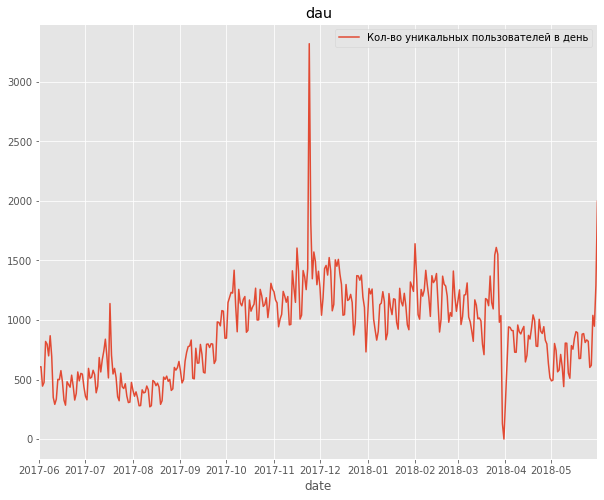

In [47]:
# Визуализируем дневную пользовательскую активность по месяцам 
dau_plot = visits.groupby('date').agg({'uid': 'nunique'}).reset_index()
dau_plot.plot(kind = 'line',x = 'date',y = 'uid', label = 'Кол-во уникальных пользователей в день', title = 'dau');

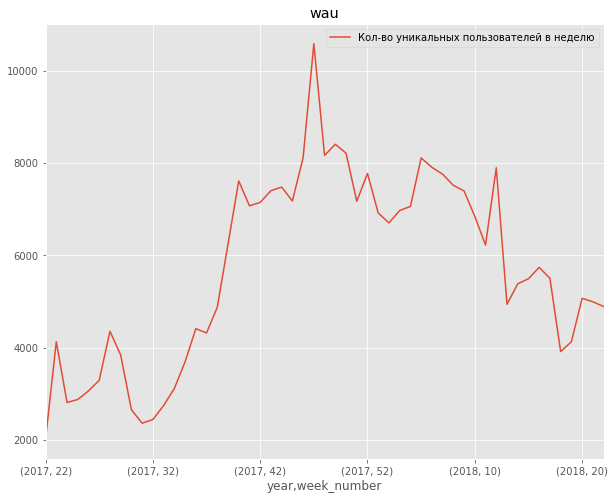

In [48]:
# Визуализируем недельную пользовательскую активность WAU 
wau_1 = visits.groupby(['year', 'week_number']).agg({'uid': 'nunique'})
wau_1.plot(kind = 'line', y = 'uid', label = 'Кол-во уникальных пользователей в неделю', title = 'wau');


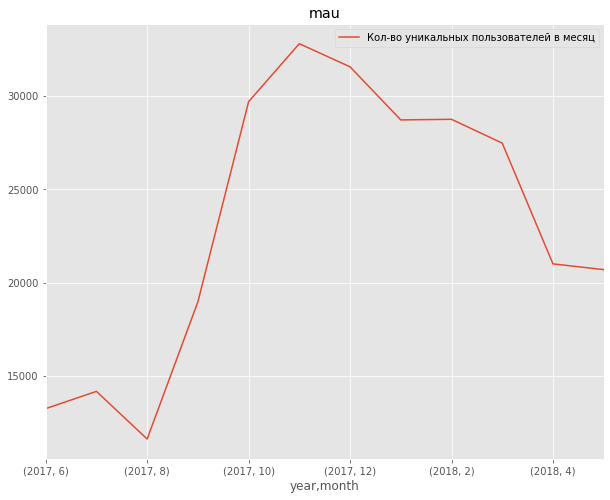

In [49]:
# Визуализируем месячную пользовательскую активность MAU 
mau_1 = visits.groupby(['year', 'month']).agg({'uid': 'nunique'})
mau_1.plot(kind = 'line', y = 'uid', label = 'Кол-во уникальных пользователей в месяц', title = 'mau');

    Sticky Factor - показатель лояльности аудитории к приложению / сервису / сайту. Показывает частоту и регулярность использования приложения и т.д. в течение недели или месяца. Этот показатель часто переводят как «Липкость», «Показатель липучести», однако более корректным следует считать интерпретацию словосочетания Sticky Factor как «Степень вовлечения». Значения этой метрики может указать на вероятно низком или высоком значении Retention (удержании) пользователей, которая является функцией для генерации дохода сервиса. Так, исследования devtodev показали, что существует корреляция между Sticky factor’ом и доходом (она составляет около 50-60%), что подтверждает влияние этого показателя на финансовые метрики продукта. Для игр считается хорошим sticky factor около 20%, а для социальных сетей и месенджеров он обычно около 50%. 
    Рассчитаем этот индекс 

In [50]:
sticky_mau = dau_total / mau_total * 100
sticky_wau = dau_total / wau_total * 100

In [51]:
sticky_mau

uid    3.90897
dtype: float64

In [52]:
sticky_wau

uid    15.884409
dtype: float64

    В предложенном временном диапазоне "Степень вовлеченности аудитории в месяц" (или удержания аудитории) - довольно низкий, как если бы DAU равнялся 1000, а MAU = 1000 * 30 = 30000. Это минимальное значение, которое может принимать данная метрика, и говорит оно о том, что пользователи не задерживаются сайте, в нашем случае. Посмотрим на динамику sticky_mau по месяцам: 

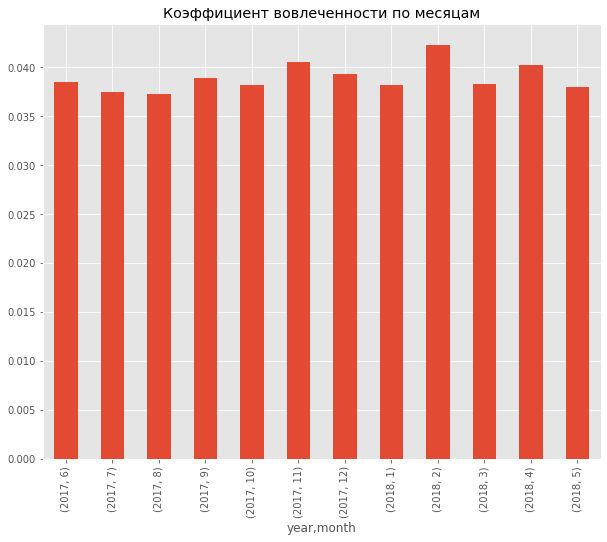

In [53]:
dau_sticky = visits.groupby(['year', 'date']).agg({'uid': 'nunique'}).reset_index()
dau_sticky['date'] = pd.to_datetime(dau_sticky['date'], format = '%Y-%m-%d')
dau_sticky['month'] = dau_sticky['date'].dt.month
mau_total_sticky = visits.groupby(['year', 'month']).agg({'uid': 'nunique'})
mau_total_sticky = mau_total_sticky.merge(dau_sticky, on=['year', 'month'], how='inner')
mau_total_sticky = mau_total_sticky.groupby(['year', 'month']).agg({'uid_x': 'mean', 'uid_y': 'mean'})
mau_total_sticky['month_sticky'] = mau_total_sticky['uid_y'] / mau_total_sticky['uid_x']
mau_total_sticky['month_sticky'].plot(kind='bar', y = 'month_sticky', title = 'Коэффициент вовлеченности по месяцам');

#### Предварительные выводы 

    Интерпретация:
    Дневная пользовательская активность за год-за весь период- (DAU), в среднем: 908 человек. Недельная пользовательская активность за весь период (WAU), в среднем: 5716 человек. Количество уникальных пользователей в месяц за весь период, в среднем: 23228 человек. Для довольно популярной платформы нельзя сказать, что цифры адекватно высокие. 

    DAU
    Что касается количества уникальных пользователей в день, то этот показатель постепенно растет с небольшой флюидностью с середины Августа 2017 года и переживает экстремальный взлет, контринтуитивно, во второй декаде (или конце) Ноября 2017 года - в этих числах пользовательская активность резко возрасла в 2.5 раза, после чего стремительно опустилась до своих наиболее характерных показателей (чуть более 1000 пользователей) уже к самому концу Ноября - начала Декабря 2017 года. В то же время, DAU переживает свое драматическое падение во второй декаде Марта 2018 года и достигает экстремально низких значений уже в самом конце месяца. По состоянию к Июню 2016 года мы снова наблюдаем существенный рост дневной пользовательской активности (уникальных пользователей, зашедших на сайт Яндекс.Афиша). Перманентные колебания DAU в диапазонах по месяцам очень напоминают "шумы" во временных рядах и могут быть производными от дня недели - выходной / будний день. Очевидно, что в выходные дни пользовательская активность развлекательно-просветительского сервиса Яндекс.Афиша будет выше. 

    WAU
    с 32 по 47 неделю (2017-го года) мы наблюдаем рост недельной пользовательской активности, далее - менее радикальное, нежели коэффициент роста, но планомерное снижение этого индекса. Уверенно выше среднего показатель недельной пользовательской активности с 38-ю 2017 года по 12-ю 2018 года недели. Это примерно середина-вторая декада Сентября (18-24 Сентября 2017) и вторая декада Марта 2018 года (19-25 Марта). Примечательно, что эти недели не являются праздничными. Очевидно, что ни DAU, ни WAU не дают нам возможности говорить о сезонности пользовательской активности на Яндекс.Афиша, скорее всего, востребованность сервиса связана с другими факторами, такими как, например, наличие выходящих Премьер в этом году / громких фестивалей, концертов. 

    MAU
    Согласно графику, самыми удачными для сервиса месяцами стали Октябрь-Декабрь 2017 года (с пиком в Ноябре 2017-го). Сентябрь 2017 - Март 2018 года - метрика выше среднего за весь исследуемый период. 

    Примечательно, что коэффициент "липкости" или показатель, который позволяет оценить регулярность посещений и стабильность пользовательской базы, довольно низкий за весь период временного диапазона. Между тем, самым удачным месяцем с точки зрения соотношения дневных и месячных уникальных пользователей (т.е. в перспективе "удержания" пользователей) стал Февраль 2017 года. Следует отметить, что дисперсия данного показателя по месяцам колеблется в десятых долях, и данная метрика довольно неинформативна в свете анализа развлекательных платформ.

In [54]:
session_count = visits.groupby('date').agg({'uid': 'count'}).mean()
print("Количество сессий в день {0:.2f} ".format(session_count[0]))

Количество сессий в день 987.36 


In [55]:
session_count = visits.groupby('date').agg({'uid': 'nunique'}).mean()
print("Количество сессий в день на уникальных пользователей {0:.2f} ".format(session_count[0]))

Количество сессий в день на уникальных пользователей 907.99 


<div style="border:solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Полный и подробный анализ метрик посещаемости. Если увеличить масштаб или уменьшить дискретность, то шумы, о которых ты пишешь, действительно станут недельной сезонностью - будни\выходные</div>  

##### Шаг 2.1.2 Посчитаем, сколько в среднем сессий в день и сколько в среднем длится одна сессия. Оценка вовлеченности в контент.

In [56]:
# Посчитаем, сколько, в среднем, сессий в день за весь период: 987
session_count_all = visits.groupby('date').agg({'uid': 'count'}).mean()
print("Количество сессий в день {0:.2f} ".format(session_count_all[0]))

Количество сессий в день 987.36 


In [57]:
# Посчитаем, сколько, в среднемй, сессий в день на уникального пользователя: 908 (столько же, сколько уникальных пользователей в день)
session_count_uniq = visits.groupby('date').agg({'uid': 'nunique'}).mean()
print("Количество сессий в день на уникальных пользователей {0:.2f} ".format(session_count[0]))

Количество сессий в день на уникальных пользователей 907.99 


In [58]:
print("На одного уникального пользователя приходится {0:.2f} сессий ".format(session_count_all[0] / session_count_uniq[0]))

На одного уникального пользователя приходится 1.09 сессий 


In [59]:
# Добавим в таблицу visits столбец с разницей начала и конца сессии для каждого пользователя
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds() / 60 

In [60]:
# Выведем статистику по полученной разнице
visits['session_duration_sec'].describe()

count    359400.000000
mean         10.717095
std          16.618796
min         -46.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: session_duration_sec, dtype: float64

In [61]:
# Обнаруживаемый не учтенный нами на этапе предподготовки данных - баг - отрицательную разницу между началом и концом сессии. 
# Избавимся от отрицательных разниц и снова посмотрим на статистику распределения разницы.
visits = visits.query('session_duration_sec >= 0').copy()

In [62]:
visits['session_duration_sec'].describe()

count    359398.000000
mean         10.717371
std          16.618420
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: session_duration_sec, dtype: float64

In [63]:
visists_mode = visits['session_duration_sec'].mode()
print("Чаще всего пользователи проводят на сервисе Яндекс.Афиша {0:.2f} минуту".format(visists_mode[0]))

Чаще всего пользователи проводят на сервисе Яндекс.Афиша 1.00 минуту


    Одна сессия длится:
    - в среднем 10.72 минут
    - в медианном 5 минут
    - в модe 1 минуту

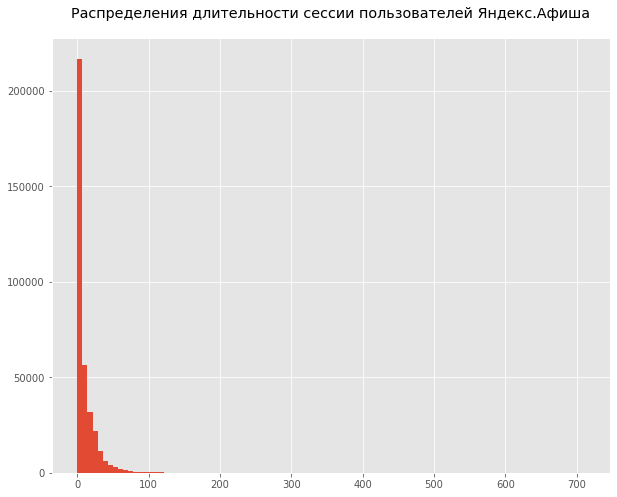

In [64]:
# Построим гистограмму распределения затраченного времени в минутах на сервисе Яндекс.Афиша
ax = visits['session_duration_sec'].hist(bins=100);
ax.set_title("Распределения длительности сессии пользователей Яндекс.Афиша", pad = 20);


    Перед нами график, напоминающий экспоненциальное распределение. Из него можно сделать предварительный вывод, что львинная доля пользователей проводят на сервисе до 30 минут. Однако, для того, чтобы быть более информативным, этого графика недостаточно из-за большого количества экстремально высоких значений или статистических выбросов. Здесь нам понадобится статистика распределения и интервалы.
    Итак, из описательной статистики распределения мы можем сделать вывод, что 75% пользователей тратят до 14 минут (включительно) на взаимодействие с сервисом. Однако, в данных мы располагаем экстремально высокими значениями (до 711 минут / 60 = ~ 11.8 часов), которые сильно искажают среднее время (разница между медианой и средним около 5.7 минут!). Очевидно, что редко применяемая мера центральной тенденции - мода - здесь наиболее адекватна - то есть наиболее выраженное значение. Между тем, интерес вызывает исследования "долгожителей" сервиса, а также более предметный взгляд на распределение времени проведенного среднестатистическим пользователем.

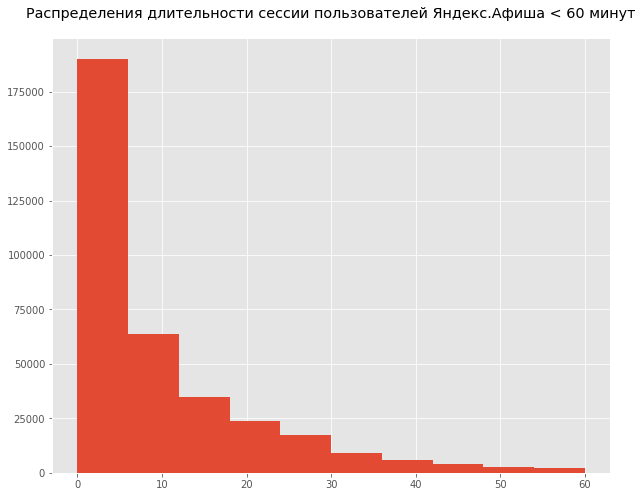

In [65]:
# Построим гистограмму распределения затраченного времени в минутах на сервисе Яндекс.Афиша до 1 часа 
ax = visits['session_duration_sec'].hist(bins=10, range=(0, 60));
ax.set_title("Распределения длительности сессии пользователей Яндекс.Афиша < 60 минут", pad = 20);

    Из графика видно, что в среднем чаще всего пользователи проводят на сервисе около 6 минут - после мы наблюдаем радикальное снижение кол-ва пользователей по доле проведенного времени.

In [66]:
# Посчитаем верхнюю границу для усов boxplot - в 1.5 межквартильных размаха, на отметке которой мы будем считать проведенное на сервисе
# время статистическим выбросом. 
visits['session_duration_sec'].describe()['75%'] + 1.5*(visits['session_duration_sec'].describe()['75%']-visits['session_duration_sec'].describe()['25%'])

32.0

In [67]:
# Посмотрим, какой процент пользователей превышает это время по визиту: около 7.8% (почти 8%) - это значение не маленькое
# околок 17 797 пользователей за весь период.
visits.query('session_duration_sec > 32.0')['uid'].nunique() / visits.uid.nunique()

0.07829284433906447

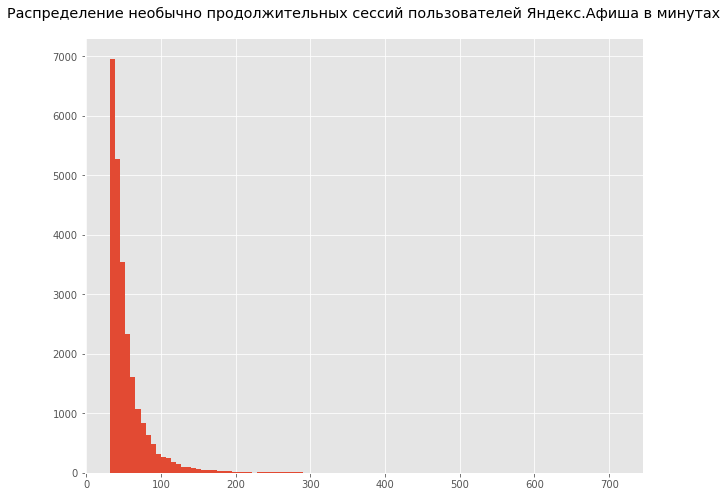

In [68]:
ax = visits['session_duration_sec'].hist(bins=100, range=(32.1, visits['session_duration_sec'].max()));
ax.set_title("Распределение необычно продолжительных сессий пользователей Яндекс.Афиша в минутах", pad = 20);

    Из графика видно, что необычно продолжительные сессии стремительно убывают до 100-120 минут, далее количество пользователей, превысивших 2 часа единовременного нахождения на сервисе - падает до единиц. Природу поведения таких пользователей следует исследовать отдель. Однако, следует отметить, что методика подсчета продолжительности сессии не учитывает уникальность id пользователей, то есть один пользователь мог многократно заходить на сервис и пролонгировать показатели времени сессии в минутах.

In [69]:
# Сравним продолжительность сессий (до 60 минут) в срезе по ресурсам: ПК и Смартфон (условно)
visits_touch = visits.query('device == "touch"')

In [70]:
visits_desktop = visits.query('device == "desktop"')

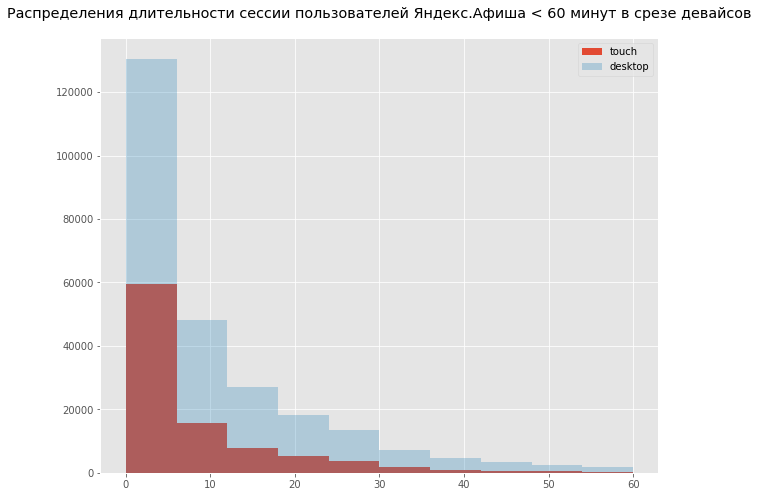

In [71]:
ax = visits_touch['session_duration_sec'].hist(bins=10, range=(0, 60), label = 'touch');
visits_desktop['session_duration_sec'].hist(bins=10, range=(0, 60), ax=ax, alpha=0.3, label = 'desktop')
ax.set_title("Распределения длительности сессии пользователей Яндекс.Афиша < 60 минут в срезе девайсов", pad = 20);
plt.legend();

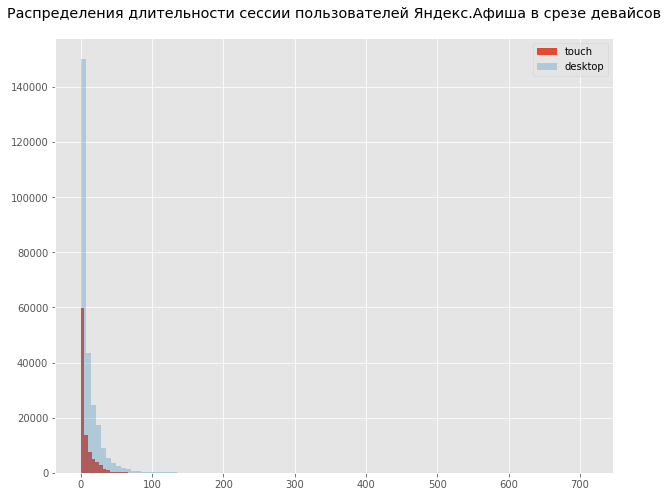

In [72]:
ax = visits_touch['session_duration_sec'].hist(bins=100, label = 'touch');
visits_desktop['session_duration_sec'].hist(bins=100, ax=ax, alpha=0.3, label = 'desktop')
ax.set_title("Распределения длительности сессии пользователей Яндекс.Афиша в срезе девайсов", pad = 20);
plt.legend();

    Из графика видно, что, несмотря на то, что пользователей гаджетов в выборке сильно меньше пользователей ПК, те, кто заходит со смартфонов тратят в разы меньше времени на Яндекс.Афиша, нежели пользователи ПК. В то же время, условных долгожителей на сайте Яндекс.Афиша - среди пользователей ПК больше - следовательно - одна из версий - пользовательские удобства использовать веб-версию сервиса для продолжительного погружение в текстовый и мультимедиа контент. В то же время, среди тех, кто пользуется ресурсом посредством смартфона также есть "долгожители". Это открывает перспективу альтернативным гипотезам о возможном присутствии на платформе профессиональных игроков.

<div style="border:solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Ты очень классно изучил время длительности сессии. Построил распределение, рассчитал различные статистики. Прокомментировал форму и выбрал наиболее адекватную статистику для описания метрики. Очень круто, что ты нашел баг в данных - отрицательные сессии</div>  

<div style="border:solid orange 2px; padding: 20px"> <b>Что можно улучшить</b><br>
Очень длинные сессии могут быть вызваны методом, который ты применяешь для расчета длительности.<br>
Используемый тобой метод `seconds` отлично работает, если есть уверенность, что даты правильные (дата окончания больше даты начала), в противном случае метод возвращает кол-во секунд в одном дне.

Посмотри на метод `total_seconds()` - он в любом случаем возвращает кол-во секунд.</div> 

##### Шаг 2.1.3 Как часто люди возвращаются (Retention Rate)

    Посчитаем одну из ключевых метрик удержания пользователей, которая демонстрирует, в частности лояльность продукту - Retention Rate. Retention (Classic) – доля пользователей, которые вернулись в приложение / сайт / др. продукт в определённый день. Мы полагаем, что для приложений/сервисов, которые используются достаточно редко: например, гидов по мероприятиям / планировщиков путешествий было бы целесообразно использовать метрику Rolling Retention (Open) - в таком случае, если, например, пользователь пришел в N день – считаем что он был активен все дни с 0 до N. Однако, остановимся на классическом Retention и оценим его релевантность.

In [73]:
visits.copy().columns.str.lower().str.replace(' ', '_')

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid', 'date',
       'day_number', 'week_number', 'month', 'year', 'day_of_week',
       'month_name', 'session_duration_sec'],
      dtype='object')

In [74]:
sessions_per_user = len(visits) / len(visits['uid'].unique())
print('В среднем на одного пользователя приходится {:.2f} сессий \n'
      'Данный показатель подтверждает то, что сервисом пользуются редко.\n'
      '\n'
      'Построим Retention Rate, чтобы посмотреть как часто возвращаются пользователи в рамках когорт'.format(sessions_per_user))

В среднем на одного пользователя приходится 1.58 сессий 
Данный показатель подтверждает то, что сервисом пользуются редко.

Построим Retention Rate, чтобы посмотреть как часто возвращаются пользователи в рамках когорт


In [75]:
# Добавим к таблицу с пользователскими логами о визитах колонку с датой и временем первого посещения Яндекс.Афиша каждым пользователем
first_visit_date = visits.groupby(['uid'])['start_ts'].min()
first_visit_date.name = 'first_visit' 
visits = visits.join(first_visit_date, on = 'uid')

In [76]:
# Экстраполируем из даты и времени первого визита и даты и времени начала каждого визита - месяц - для каждого пользователя. 
# Месяц - адекватный критерий категоризации когорт для данных за 1 год
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')

In [77]:
# Выделим когорты по месяцам - расчитаем и добавим столбец с временем жизни пользователя на каждом визите
visits['lifetime'] = (visits['visit_month'] - visits['first_visit_month']) / np.timedelta64(1, 'M')
visits['lifetime'] = visits['lifetime'].round().astype('int')

In [78]:
# Метрика Retention расчитывается как количество уникальных пользователей каждой когорты на каждом интервале "жизни" пользователя 
# относительно кол-ва уникальных пользователей в первый месяц взаимодействия с продуктом. Поэтому, нам необходимо добавить в сгруппированную
# по когортам (1-му месяцу) и интервали "жизни" (lifetime), столбец с кол-ом уникальных пользователей в первый день жизни когорты.

cohorts = visits.groupby(['first_visit_month','lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['lifetime'] == 0][['first_visit_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

In [79]:
cohorts = cohorts.merge(initial_users_count,on='first_visit_month')

In [80]:
# Рассчитаем Retention Rate - разделив кол-во уник. пользователей каждой когорты на кол-во уник. пользователей этой когорты первого дня
# взаимодействия с продуктом (т.е. lifetime=0). 
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_visit_month',
                                      columns='lifetime',values='retention',aggfunc='sum')

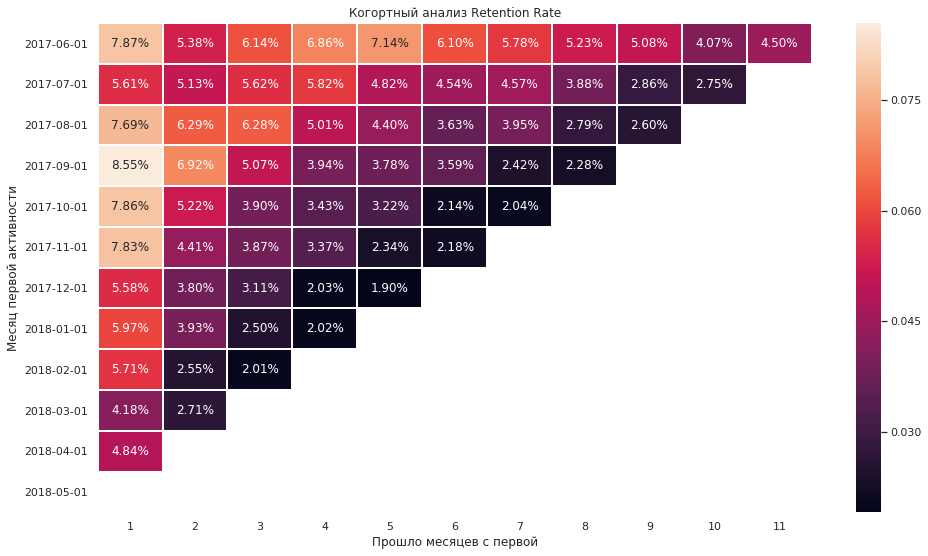

In [81]:
# Построим и выведем тепловую карту Retention Rate, исключив столбец с 0-м lifetime для наглядности
sns.set(style = 'whitegrid')
plt.figure(figsize = (16, 9))
plt.title('Когортный анализ Retention Rate')
ax = sns.heatmap(retention_pivot.iloc[:,1:], annot=True, fmt='.2%', linewidths=1, linecolor='white')
ax.set_yticklabels(retention_pivot.index.date)
plt.xlabel('Прошло месяцев с первой')
plt.ylabel('Месяц первой активности')
plt.show()

In [82]:
# Прежде, чем приступить к интерпретации результатов, выведем куммулятивную таблицу с Retention Rate по усредненным значениям
# по всем когортам за каждый последующий месяц после первого визита на Яндекс.Афиша.
retention_pivot.mean() * 100

lifetime
0     100.000000
1       6.516660
2       4.633262
3       4.275990
4       4.059457
5       3.944383
6       3.695659
7       3.750912
8       3.546465
9       3.515906
10      3.406250
11      4.495060
dtype: float64

#### Предварительные выводы

    Итак, коэффициент удержания пользователей довольно низкий по всем когортам на всех месяцах пользовательской активности: он колеблется от примерно 3.4% до 6.5%. Это говорит о том, что порядка 90%-95% пользователей уходят из платформы уже буквально на следующий месяц после опыта первого пользования. Однако, мы полагаем, что в этом нет ничего контр-интуитивного: Во-первых, специфика любого сервиса по продаже билетов на развлекательные мероприятия: театры, концерты, кино, мюзиклы, шоу и пр. сильно выражена в партикулярном спросе на конкретное событие (аудитория таких сервисов ангажирована и в большинстве случаев приобретает билеты на резонансные мероприятия (например, концерт Дениса Мацуева, Теодора Курентзиса или спектакль Константина Богомолова), которые проходят сильно реже условного спектакля  "Укрощение стрОптивой" в театре "Сатирикон" - поинт - аудиторию трегирит "событие"; В-третьих, большие громкие театральные премьеры, концерты в малых и средних городах проходят реже (урбанистический фактор расслоение городского населения по доступам к благам и услугам), Во-вторых, среднестатистический обыватель, коим является пользователь, довольно слабо привержен проводить свободное от работы время в рамках "культурного досуга".
    Так, согласно открытым данным "Левада-Центра": 1) Каждый второй житель России никогда не был в театре, консерватории или музее (55%), 2) Еще выше число тех, кто никогда не бывал на концерте любимых групп или исполнителей (64%), 3) более 50% из тех, кто посещает театры, музеи или концерты, делают это несколько раз в год или реже, 4) 1/4 россиян посещает кинотеатры (однако лишь 5% из них делают это еженедельно), в то время как ежегодный прирост аудитории этой категории растет за счет тех, кто бывает кинотеатрах хотя бы 1-2 раза в месяц. (Данные: , 24-29 мая 2019 год, репрезентативная всероссийская выборка городского и сельского населения 1616 чел. в возрасте > 18 по 137 населенным пунктам 50 субъектов РФ.
    В-четвертых, в 2017-2018 годах мы наблюдаем уверенную социально-экономическую рецессию на фоне падения цен на нефть и последствия эскалации военно-политического конфликта на Востоке Украины (международных санкций) - отразившейся на потребительской корзине городского жителя. 
    Принимая во внимание эти обстоятельства, данные о низком Retention Rate не кажутся неоднозначными. 

    Негативный сценарий:
    Динамику retention rate все же стоит оценивать ввиду наличия на городском рынке довольно крупных и легитимных конкурентов, таких как Ticketland, Concert.ru, Parter.ru, Intickets, Ponominalu.ru. Некоторые из этих похожих сервисов также имеют продолжительную историю взаимодействия с городским пользователем. То есть, некоторая доля тех, кто однажды попробовал приобрести билет на Яндекс.Афиша, могут конвертнуться на альтернативном сервисе или зайдя на сайт/приложение Яндекс.Афиша, вернуться к "проверенному" сервису, которому лоялен пользователь. Здесь одной метрикой Retention Rate не обойтись, нужно смотреть на конверсии в покупку и повторные покупки. 

    Некоторые детали располагаемого Retention Rate:
    1) По всем когортам в среднем чаще всего пользователи возвращаются в сервис на 2-м (6.5%), 3-м (4.6%) и 12-м (4.5%) месяце.
    2) Визуально, самые позитивные показатели у когорты 2017-06-01 (Июнь 2017) - на всем времени взаимодействия с продуктом. На 6-м месяце коэффициент возврата у этой когорты почти приблизился к показателю 2-го месяца (самого высокого по когорте), в то время как на 12-й месяц retention этой когорты выходит в уверенный рост и превышает все остальные коэффициенты этой метрики по другим когортам (в пересчете на последний месяц)

<div style="border:solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Тут, ничего не попишешь статистика говорит, что лучше не будет. Спасибо за подробные комментарии и доп информацию</div> 

#### Шаг 2.2. Метрики продаж

##### Шаг 2.2.1. Как люди начинают покупать?

    Сначала смотрим, когда люди начинают покупать с первого визита на сайт до первой покупки

In [83]:
# Создадим переменную, в которой сохраним сгруппированный датафрейм по id и первой датой посещения сервиса
first_visit = visits.groupby('uid').agg({'start_ts':'min'})\
                .rename(columns={'start_ts':'first_visit_datetime'})\
                .reset_index()
# Создадим столбец - день - первого визита 
first_visit['first_visit_date'] = first_visit['first_visit_datetime'].astype('datetime64[D]')
first_visit.head(3)

,uid,first_visit_datetime,first_visit_date
0,11863502262781,2018-03-01 17:27:00,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06
2,297729379853735,2017-06-07 18:47:00,2017-06-07


In [84]:
# Создадим переменную, в которой сохраним датафрейм с агрегированными данными по id и датой и временем первой покупки
first_order = orders.groupby('uid').agg({'purchase_ts':'min'})\
                .rename(columns={'purchase_ts':'first_purchase_datetime'})\
                .reset_index()
# Создадим столбец с датой первой покупки
first_order['first_purchase_date'] = first_order['first_purchase_datetime'].astype('datetime64[D]')
first_order.head(3)

,uid,first_purchase_datetime,first_purchase_date
0,313578113262317,2018-01-03 21:51:00,2018-01-03
1,1575281904278712,2017-06-03 10:13:00,2017-06-03
2,2429014661409475,2017-10-11 18:33:00,2017-10-11


In [85]:
# Создадим новый датафрейм, в котором соединим полученные на предыдущем шаге переменные по столбцу id
buying_time = first_visit.merge(first_order, on='uid', how='inner')
buying_time

,uid,first_visit_datetime,first_visit_date,first_purchase_datetime,first_purchase_date
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2018-01-03 21:51:00,2018-01-03
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-03 10:13:00,2017-06-03
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-11 18:33:00,2017-10-11
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-28 15:54:00,2018-01-28
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-24 10:14:00,2017-11-24
...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-08-20,2017-11-24 09:03:00,2017-11-24
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22,2017-09-22 23:55:00,2017-09-22
36520,18445601152732270159,2017-08-07 11:51:00,2017-08-07,2018-03-26 22:54:00,2018-03-26
36521,18446156210226471712,2017-11-07 10:01:00,2017-11-07,2018-02-18 19:34:00,2018-02-18


In [86]:
# Создадим стобец, в котором отразим разницу между днем первой покупки и днем первого визита на платформу: таким образом получим разницу
# в днях для последующей группировки. Именно дни кажутся релевантными на данном этапе, т.к. далеко не все пользователи 
# конвертируются в покпку в первый день пользования сервисом и агрегирование по дня кажется удобным, информативным и наглядным
buying_time['buying_time'] = (buying_time['first_purchase_date'] - buying_time['first_visit_date']).dt.days / 1

In [87]:
# Переведем полученную колонку в с разницей в целочисленный тип данных
buying_time['buying_time'] = buying_time['buying_time'].round().astype('int64')

In [88]:
buying_time

,uid,first_visit_datetime,first_visit_date,first_purchase_datetime,first_purchase_date,buying_time
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2018-01-03 21:51:00,2018-01-03,107
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-03 10:13:00,2017-06-03,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-11 18:33:00,2017-10-11,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-28 15:54:00,2018-01-28,1
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-24 10:14:00,2017-11-24,0
...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-08-20,2017-11-24 09:03:00,2017-11-24,96
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22,2017-09-22 23:55:00,2017-09-22,0
36520,18445601152732270159,2017-08-07 11:51:00,2017-08-07,2018-03-26 22:54:00,2018-03-26,231
36521,18446156210226471712,2017-11-07 10:01:00,2017-11-07,2018-02-18 19:34:00,2018-02-18,103


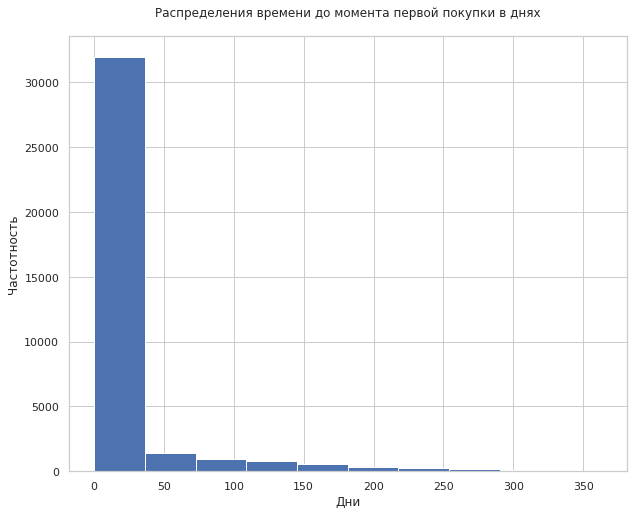

In [89]:
# Построим гистограмму распределения пользователей по времени в днях с момента первого визита на сервис и первой покупки
ax = buying_time.buying_time.hist(bins=10);
ax.set_title("Распределения времени до момента первой покупки в днях", pad = 20)
plt.xlabel('Дни')
plt.ylabel('Частотность');


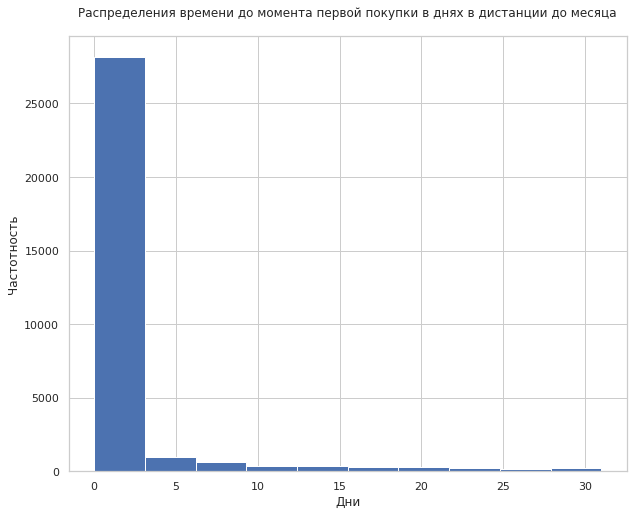

In [90]:
# Построим гистограмму распределения пользователей по времени в днях с момента первого визита на сервис и первой покупки
ax = buying_time.buying_time.hist(bins=10, range=(0,31));
ax.set_title("Распределения времени до момента первой покупки в днях в дистанции до месяца", pad = 20)
plt.xlabel('Дни')
plt.ylabel('Частотность');

In [91]:
buying_time.buying_time.describe()

count    36523.000000
mean        16.895901
std         47.071200
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: buying_time, dtype: float64

In [92]:
buying_time.buying_time.mode()

0    0
dtype: int64

    Из гистограмм и описательной статистики мы можем сделать следующие выводы: чаще всего клиенты покупают в первый день просмотра страницы сервиса, что говорит о "теплых" покупках. В купе с этими пользователями большинсство составляют также клиенты, приобретающие билеты на 1-й, 2-й и 3-й день. Здесь также следует отметить, что рассматриваемые группы формировались по значениям в разнице днях. С одной стороны, мы отметили, что такая категоризация удобна, ввиду того, что, если бы мы измеряли разницу в часах/секундах/минутах - распределение получилось бы мало информативным (учитывая наличие экстремально высоких значений разницы - некоторые пользователи конвертируются в покупку на 101 день и позже). Между тем, те пользователи, которые впервые посетили сервис и конвертировались в покупку на, скажем так, "границе" суток (т.е., допустим, впервые зашли на сервис в 01.06.17 23:55, а приобрели в 02.06.17 00:10) оказались отнесены не к 0-й , но альтернативной группе 1-го дня. Здесь разница между онтическим (формой) и онтологическим (смыслом) категоризации проявляется и несколько искажает общее понимание картины. Следовательно, как минимум группы 0-го и 1-го дня могут сильно пересекаться. 
    В среднем пользователи конвертируются в покупку на 16-17-й день, однако, мера центральной тенденции "среднее" в данном случае не совсем релевантна, так как среднее подвержено экстремальным значениям (статистическим выбросам: медиана и среднее сильно различаются в нашей выборке - на 16.9 суток). В целом по выборке - абсолютное большинство клиетов приобретают билеты примерно до 30 дней после первого визита на сервис. Однако, наиболее точно определить границу поможет расчет значения верхней границы усов boxplot.

In [93]:
buying_time['buing_time_min'] = (buying_time['first_purchase_datetime'] - buying_time['first_visit_datetime']).dt.seconds / 60

In [94]:
buying_time_24 = buying_time.query('buying_time == 0').copy()

In [95]:
buying_time_24.head()

,uid,first_visit_datetime,first_visit_date,first_purchase_datetime,first_purchase_date,buying_time,buing_time_min
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-03 10:13:00,2017-06-03,0,0.0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-11 18:33:00,2017-10-11,0,79.0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-24 10:14:00,2017-11-24,0,0.0
5,3077748354309989,2018-03-03 12:08:00,2018-03-03,2018-03-03 12:33:00,2018-03-03,0,25.0
7,3753586865891862,2018-03-03 13:47:00,2018-03-03,2018-03-03 13:50:00,2018-03-03,0,3.0


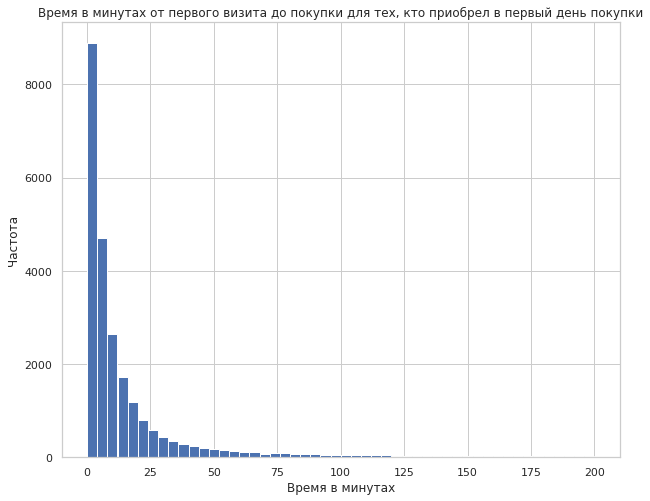

In [96]:
ax = buying_time_24['buing_time_min'].hist(bins=50, range=(0, 200))
ax.set_xlabel('Время в минутах')
ax.set_ylabel('Частота')
ax.set_title('Время в минутах от первого визита до покупки для тех, кто приобрел в первый день покупки');

In [97]:
buying_time_24['buing_time_min'].mode()

0    1.0
dtype: float64

In [98]:
buying_time_24['buing_time_min'].describe()

count    25039.000000
mean        33.616678
std        104.472851
min          0.000000
25%          2.000000
50%          6.000000
75%         18.000000
max       1372.000000
Name: buing_time_min, dtype: float64

    Исходя из диаграммы распределения значений в минутах от первого визита до первой покупки для тех 25039 пользователей, которые конвертировались в покупки в тот же день, что и впервые посетили сайт, а также описательной статистики, можно сделать вывод, что чаще всего такие пользователи покупают на 1-й минуте, в среднем(здесь это также относительно релевантно применить) на 33-й минуте. Подавляющее большинство пользователей (75% процентиль) конвертируются в покупки до 18 минут с момента первого посещения сервиса.
    Мы могли бы экстраполировать эти выводу на всю выборку покупателей 1-х суток, однако, следует обратить внимание на то, что в группы не попали пользователи, как и в первом случае, на пограничных датах - мы отсеили всех не нулевых пользователей.

In [99]:
# Проверим, есть ли в данных подозрительно быстрые клиенты, конвертировавшиеся в покпку буквально в ту же минуту, 
# что впервые посетили сервис
buying_time_24[buying_time_24['buing_time_min'] == 0].count()

uid                        2455
first_visit_datetime       2455
first_visit_date           2455
first_purchase_datetime    2455
first_purchase_date        2455
buying_time                2455
buing_time_min             2455
dtype: int64

    Да, такие пользователи (с мгновенной конвертацией в покупку) имеются! Их количество 2455. Нельзя однозначно утверждать, являются ли эти данные багом, или свидетельствует о группе чрезвычайно мотивированных и лояльных продукту пользователях - мы не располагаем данными о секундах и милисекундах в данных.

<div style="border:solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Вероятно, очень хотели на концерт любимой группы✅</div> 

#### Шаг 2.2.2. Сколько раз покупают за период?

In [100]:
# предварительно создадим сводную таблицу по первым визитам на сайт и транзакциям

In [101]:
orders_and_visits = orders.merge(first_visit)
orders_and_visits

,purchase_ts,revenue,uid,first_visit_datetime,first_visit_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,2018-05-31
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,2018-05-31
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,2018-05-31
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,2017-10-23


In [102]:
# Создадим колонки с датой покупки, неделей, месяцем, годом
orders_and_visits['purchase_date'] = orders_and_visits['purchase_ts'].dt.date
orders_and_visits['purchases_week'] = orders_and_visits['purchase_ts'].dt.week
orders_and_visits['purchase_month'] = orders_and_visits['purchase_ts'].dt.month
orders_and_visits['purchase_year'] = orders_and_visits['purchase_ts'].dt.year
orders_and_visits.head(1)

,purchase_ts,revenue,uid,first_visit_datetime,first_visit_date,purchase_date,purchases_week,purchase_month,purchase_year
0,2017-06-01 00:10:00,17.0,10329302124590727494,2017-06-01 00:09:00,2017-06-01,2017-06-01,22,6,2017


In [103]:
# Посчитаем количество транзакций по дате, неделе, месяцу
purchases_per_day = orders_and_visits.groupby('purchase_date')['uid'].count()
purchases_per_week = orders_and_visits.groupby(['purchases_week'])['uid'].count()
purchases_per_month = orders_and_visits.groupby(['purchase_month'])['uid'].count()

In [104]:
# Создадим датафрейм, в котором создадим колонки с описательной статистикой покупок по дате, неделе, месяцу
orders_count = pd.DataFrame()

In [105]:
orders_count['per_day'] = purchases_per_day.describe()

In [106]:
orders_count['per_week'] = purchases_per_week.describe()

In [107]:
orders_count['per_month'] = purchases_per_month.describe()

In [108]:
# Выведем описательную статистику: игнорируем 1 покупку 2018-06-01, которая сложится с покупками 2017-06-01
orders_count.head(8)

,per_day,per_week,per_month
count,364.000000,52.000000,12.000000
mean,138.502747,969.519231,4201.250000
std,76.858480,397.630457,1511.861052
min,1.000000,314.000000,1807.000000
25%,82.750000,658.500000,3045.500000
50%,136.000000,997.500000,4533.500000
75%,177.000000,1270.500000,5409.250000
max,814.000000,1894.000000,6218.000000


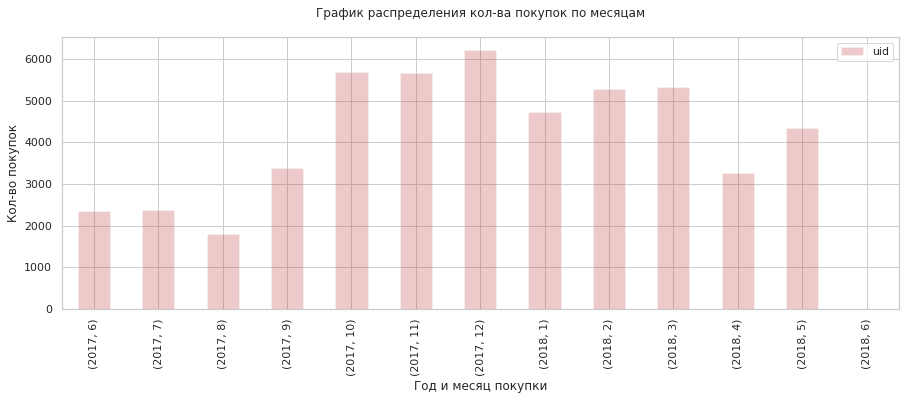

In [109]:
# Построим график распределения покупок по месяцам  
ax = orders_and_visits.groupby(['purchase_year', 'purchase_month']).agg({'uid': 'count'}) \
    .plot(kind='bar', grid=True, figsize=(15, 5), color = 'r', alpha=0.3);
ax.set_title("График распределения кол-ва покупок по месяцам", pad = 20)
ax.set_xlabel('Год и месяц покупки')
ax.set_ylabel('Кол-во покупок');

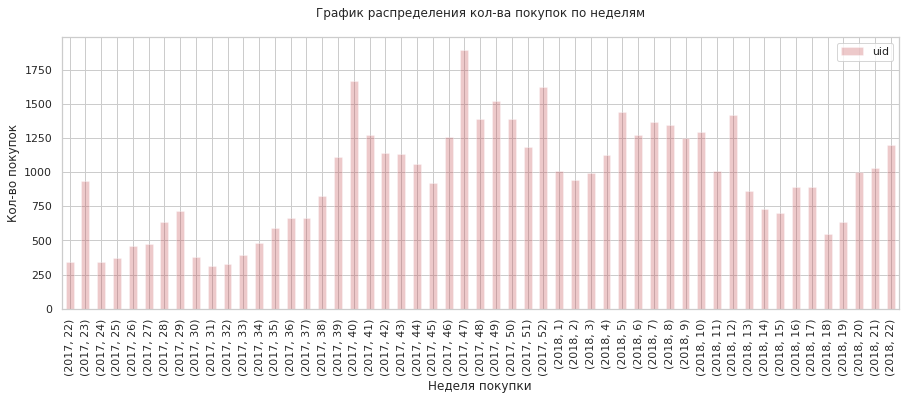

In [110]:
# Построим график распределения покупок по неделям 
ax = orders_and_visits.groupby(['purchase_year', 'purchases_week']).agg({'uid': 'count'}) \
    .plot(kind='bar', grid=True, figsize=(15, 5), color = 'r', alpha=0.3);
ax.set_title("График распределения кол-ва покупок по неделям", pad = 20)
ax.set_xlabel('Неделя покупки')
ax.set_ylabel('Кол-во покупок');

    Итак, в среднем за весь период клиенты покупают 138.5 (примерно 139) покупок в день, 969,52 (примерно 970) покупок в неделю и совершают 4201 покупку в месяц. Это информация по всем клиентам за год. Больше всего покупок клиенты сделали в декабре 2017 года, октябрь, ноябрь, декабрь 2017 года - период наиболее частых покупок (от более 5000 до болеее 6000 покупок), неплохие показатели на февраль и март - свыше 5000 покупок. График недельных покупок - волнообразный и очень напоминает сезонность. Покупки растут с 37 по 40 неделю 2017 года, с 46 по 47 с 51 по 52 2017 года, с 11 по 12 неделю 2018 года и с 19 по 20-ю неделю. 

    Посмотрим, сколько покупок на одного пользователя (в среднем) в день, неделю, месяц, год

In [111]:
orders['buy_date'] = orders['purchase_ts'].dt.date
orders['buy_week'] = orders['purchase_ts'].dt.week
orders['buy_month'] = orders['purchase_ts'].dt.month
orders['buy_year'] = orders['purchase_ts'].dt.year



In [112]:
buying_time['purchase_date'] = orders['purchase_ts'].dt.date
orders['purchase_week'] = orders['purchase_ts'].dt.week
orders['buy_month'] = orders['purchase_ts'].dt.month
orders['buy_year'] = orders['purchase_ts'].dt.year

In [113]:
day_purchases_per_user = orders.groupby(['buy_date', 'uid']).agg({'purchase_ts':'count'}).mean()[0]
week_purchases_per_user = orders.groupby(['buy_year', 'buy_week', 'uid']).agg({'purchase_ts':'count'}).mean()[0]
month_purchases_per_user = orders.groupby(['buy_month', 'uid']).agg({'purchase_ts':'count'}).mean()[0]
year_purchases_per_user = orders.groupby(['buy_year', 'uid']).agg({'purchase_ts':'count'}).mean()[0]
print('''В среднем на одного пользователя покупок:
В день - {:.2f},
В неделю - {:.2f},
В месяц - {:.2f},
В год - {:.2f}

Покупок мало, в дальнейшем можно сделать когортный анализ по количеству покупок на клиента - когорты выведем по дате первой сессии'''.format(day_purchases_per_user, week_purchases_per_user, month_purchases_per_user, year_purchases_per_user))

В среднем на одного пользователя покупок:
В день - 1.08,
В неделю - 1.16,
В месяц - 1.23,
В год - 1.32

Покупок мало, в дальнейшем можно сделать когортный анализ по количеству покупок на клиента - когорты выведем по дате первой сессии


#### Шаг 2.2.3. Какой средний чек?

    Для того, чтобы ответить на этот вопрос, посчитаем общие по всей выборки и клиентам метрики "средний чек", ARPU, ARPPU. Посчитаем средний чек - стоимость покупок на количество транзакций, ARPU - средний доход на пользователя, ARPPU - средний доход на клиента (платящего пользователя).

In [114]:
orders_and_visits['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

In [115]:
#  Построим график распределения выручки по месяцам
mean_purchase_by_month_year = orders_and_visits.groupby(['purchase_year', 'purchase_month']).agg({'revenue': 'mean'})

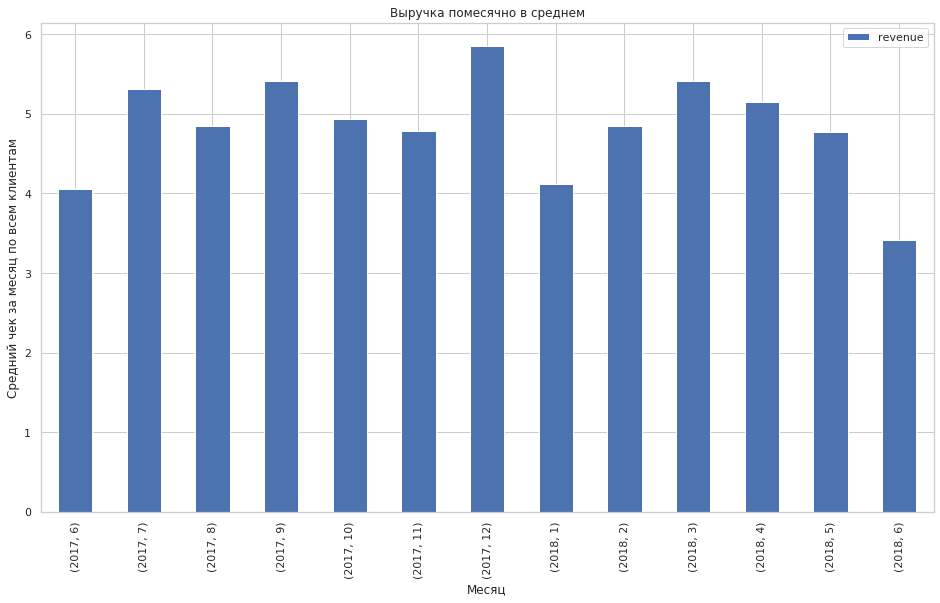

In [116]:
ax = mean_purchase_by_month_year.plot(kind='bar', figsize=(16, 9))
plt.title('Выручка помесячно в среднем')
ax.set_xlabel('Месяц')
ax.set_ylabel('Средний чек за месяц по всем клиентам')
plt.show()

In [117]:
# Посчитаем средний чек (Нужно разделить общую сумму покупок - прибыль - на общее количество покупок)
avg_check = orders.revenue.sum() / orders.purchase_ts.count()
avg_check

4.999646930477041

<div style="border:solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Средний чек рассчитан верно</div> 

<a class="anchor" id="10-bullet">

<div style="border:solid red 2px; padding: 20px"> <b>Что необходимо доработать</b><br>
В ячейке выше ошибка - отсутствует переменная <code>retention_buy</code></div>

<div style="border:solid blue 2px; padding: 20px">Привет! Я просто почитал алтернативным способом ARPPU - далее привел классический споспоб расчета, который был показан в Практикуме. Я просто сейчас удалил первый способ расчета. 

<div style="border:solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>
Классно, что ты рассмотрел метрики, выходящеи за рамки теоретического курса. Как говорится, инициатива наказуема, есть два момента:<br>
<ul>
    <li> работа должна запускаться без ошибок (как автотесты при разработке)
    <li> от ячейки с ошибкой могут зависеть расчеты ниже</ul><br>
Сейчас все отработало отлично, спасибо за исправления.</div>

In [118]:
# Альернативный способ подсчета ARPPU (сравним)
ARPPU = orders.revenue.sum() / orders.uid.nunique()
ARPPU

6.9013279303452615

In [119]:
#  Посчитаем ARPU средний доход на привлеченного пользователя
convertion = orders.uid.nunique() / visits.uid.nunique() 
ARPU = convertion * ARPPU
ARPU

1.1046952039935312

In [120]:
# Альернативный способ подсчета ARPU, проверим
ARPU_2 = orders.revenue.sum() / visits.uid.nunique()
ARPU_2

1.104695203993531

    Итак, средний чек по всем клиентам: примерно 5. Средний доход на платящего пользователя ARPPU составляет 6.9 у.е. . Средний доход с привлеченного пользователя 1.1 у.е. 

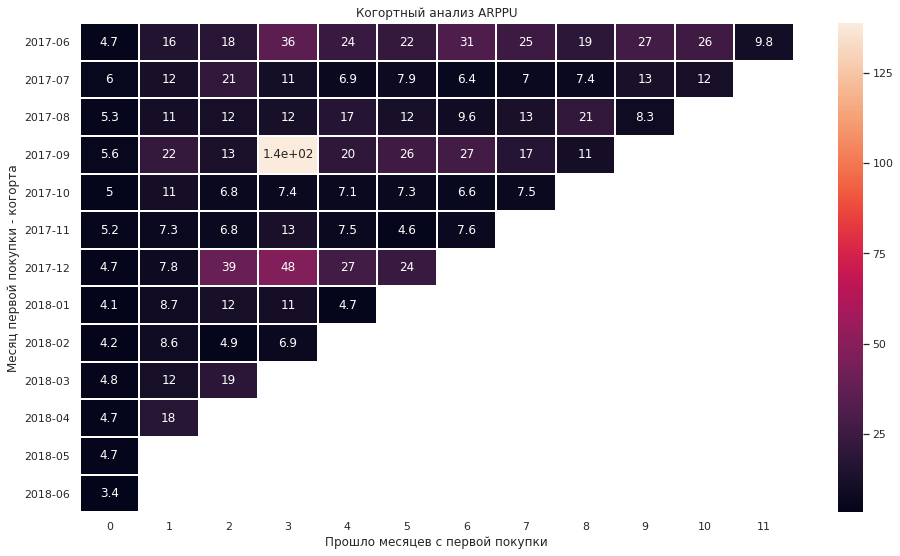

In [121]:
# Посчитаем изменение ARPPU (среднего чека на платящего пользователя с течением времени )
first_purchase_dates = orders_and_visits.groupby('uid')['purchase_ts'].min()
first_purchase_dates.name = 'first_purchase_datetime'
purchases = orders_and_visits.join(first_purchase_dates, on='uid')
purchases['purchase_month'] = purchases['purchase_ts'].astype('datetime64[M]')
purchases['first_purchase_month'] = purchases['first_purchase_datetime'].astype('datetime64[M]')

orders_grouped_by_cohorts = purchases.groupby(['first_purchase_month','purchase_month']).agg({'revenue':'sum','uid':'nunique'})

orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid'] 

orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()

orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['purchase_month'] - orders_grouped_by_cohorts['first_purchase_month']
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1,'M')
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')

orders_grouped_by_cohorts['first_purchase_month'].dt.strftime('%d.%m.%Y') 

orders_grouped_by_cohorts['first_purchase_month'] = orders_grouped_by_cohorts['first_purchase_month'].dt.strftime('%Y-%m')

revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(index='first_purchase_month',columns='cohort_lifetime',values='revenue_per_user',aggfunc='mean')
sns.set(style = 'whitegrid')
plt.figure(figsize = (16, 9))
plt.title('Когортный анализ ARPPU')
ax = sns.heatmap(revenue_per_user_pivot, annot=True, linewidths=1, linecolor='white')
plt.xlabel('Прошло месяцев с первой покупки')
plt.ylabel('Месяц первой покупки - когорта')
plt.show()


    Итак, из данных мы можем сделать следующие выводы: 
    1. Самый высокий средний доход на платящего пользователя у когорты Июнь 2017 года. 
    2. Когорта Сентября 2017 года отличается своим невероятно высокими чеками в Декабре 2017 года, что может быть следствием специфической рекламы перед новогодними праздниками.
    3. Довольно уверенный доход на платящего пользователя мы обнаруживаем у когорты Декабря 2017 года, уже на 2-й месяц после первой покупки пользователи этой когорты монетизируется в 8 раз выше, при этом довольно высокая выручка от пользователей этой когорты сохранятся в январе и феврале 2018 года (до 24 у.е.) 
    4. Вообще, когорты по ARPPU хорошо разбиваются на тех, кто совершил первую покупку до Сентября 2017 года и после. Первые конвертируются в покупку на более объемные суммы, нежели другие

<div style="border:solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>
С выводами все верно. Молодец, что отметил, ранние когорты с большей выроучкой, но ты судишь по окончательному показателю, чтобы сравнение было корректным, следует рассчитать средий показатель за определенный период (например, 3-6-9 месяцев) для тех когорт кототорые прожили этот период</div>   

<div style="border:solid orange 2px; padding: 20px"> <b>Что можно улучшить</b><br>
Чтобы тепловая карта не выглядела как черные шашечки, ты можешь использовать параметры <code>vmin и vmax</code>, тогда появится цветографическое разделение</div> 

#### Шаг 2.2.4. Сколько денег приносят (LTV)?

    В данном разделе посчитаем сумму выручки за одного покупателя по когортам, рассчитаем LTV общий по когортам первой покупки, а также LTV по когортам первой покупки в срезе источников трафика

In [122]:
# Проверим, совпадают ли даты костов за трафик и даты пользовательских транзакций
costs.date.describe()

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: date, dtype: object

In [123]:
orders.purchase_ts.describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: purchase_ts, dtype: object

    Дата первой и последней покупки не расходится с датами оплаты стоимости источников трафика

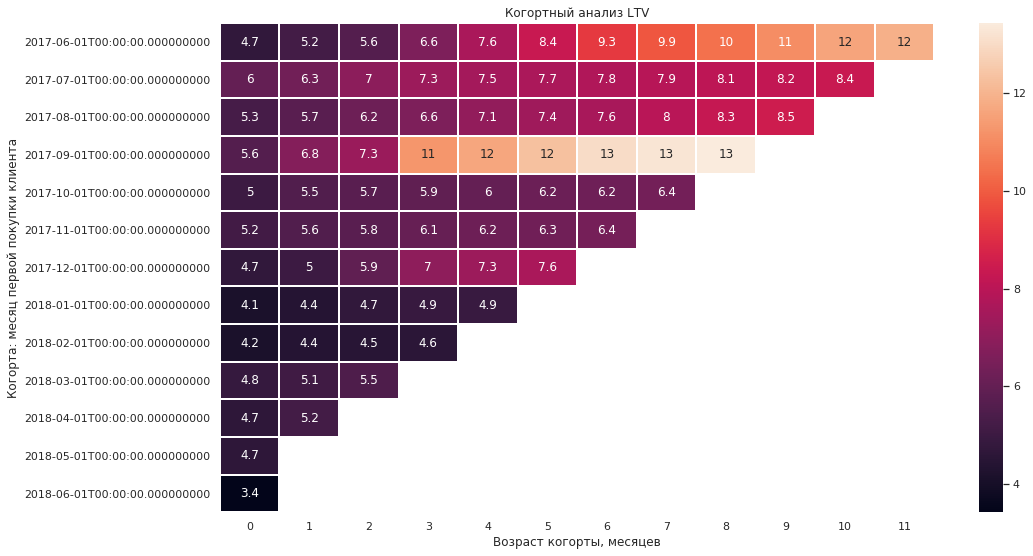

In [124]:
# Создадим когорты по первому месяцу покупки 
orders['purchase_ts'] = pd.to_datetime(orders['purchase_ts'])
costs['date'] = pd.to_datetime(costs['date'])

orders['order_month'] = orders['purchase_ts'].astype('datetime64[M]')
costs['cost_month'] = costs['date'].astype('datetime64[M]')

first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()

cohort_sizes.columns = ['first_order_month', 'n_buyers']

# Валовая прибыль вычисляется по формуле "валовой прибыли" revenue * margin_rate. Ввиду того,что 
# маржинальность Яндекс.Афиша нам неизвестна, примем в проекте ее за 1., то есть будем считать валовую прибыль по выручке revenue

margin_rate = 1
orders_first_month = pd.merge(orders,first_orders, on='uid')

cohorts = orders_first_month.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['gp'] / report['n_buyers']

result = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').cumsum(axis=1)

sns.set(style = 'whitegrid')
plt.figure(figsize = (16, 9))
plt.title('Когортный анализ LTV')
ax = sns.heatmap(result, annot=True, linewidths=1, linecolor='white')

plt.xlabel('Возраст когорты, месяцев')
plt.ylabel('Когорта: месяц первой покупки клиента')
plt.show()

    По всем когортам из всех источников трафика за весь период мы можем сделать вывод:
        1. Самые монетизируемые когорты - это пользователи, пришедшие впервые на сервис в Июне 2017 года и Сентябре 2017 года. Средний акопительный доход с каждого пользователя этих когорт местами в 2 раза превышает доход от пользователей, пришедших впервые ранее или позднее на сервис. Когорта Сентября 2017 года наиболее перспективная, уже через 6 месяцев доход на пользователя этой когорты превысил все остальные. Когорта Июня 2017 года стартовала с одними из самых низких чеков, но монетизировалась радикально. На втором месяце по монетизации пользователи когорт Июля и Августа 2018 года - средний доход за 10-11 месяц на пользователя составляет 8.5 и 8.4 у.е. и он довольно стабильный за весь период "жизни" клиента. К наименее перспективным когортам можно отнести пользователей, впервые пришедших на сервис в Январе и Феврале 2018 года - они стартовали с низких чеков и не монетизировались за обследуемый период до лета 2018 года, несмотря на то, что фактор посленовогодних праздников в перспективе до весны уже менее значим. Можно прогнозировать, что когорты Июня и Августа 2018 года останутся стабильно прибыльными, в то время как когорты Октября и Ноября вряд ли монитизируются сильнее и останутся середнячками. 
      2. К несчастью, с течением времени потребительская лояльность пользователей сервису в плане спроса не становится крепче, с каждым новым месяцем первые и повторные покупки суммарно уменьшаются относительно "условных" пионеров на всем времени жизни "клиентов".

    Посчитаем по источникам трафика, чтобы определить, пользователи из какого ресурса генерируют больше всего денег и какова динамика прибыли в среднем на одного пользователя разных когорт (по первой дате покупки) по месяцам (или в течение "жизни" клиента). То есть построим LTV по пользовательским когортам от месяца первого визита до месяца покупки. 

    Сначала построим LTV по когортам (первого визита) и lifitime от первого визита до покупки по всем источникам. Затем построим LTV по когортам (от первой покупки до повторной) и lifetime кол-во месяцев от первой покупки до повторной по всем источникам.

In [125]:
first_1 = visits.groupby('uid').agg({'first_visit' :'min', 'source_id':'first'}).reset_index()
size_cohort = first_1.groupby(['first_visit', 'source_id']).agg({'uid': 'nunique'}).reset_index()

In [126]:
size_cohort.columns = ['first_session', 'source_id', 'new_user']
size_cohort.head(2)

,first_session,source_id,new_user
0,2017-06-01 00:01:00,5,1
1,2017-06-01 00:02:00,3,2


In [127]:
new_orders = pd.merge(orders, first_1, on = 'uid')
new_orders
cohort = new_orders.groupby(['first_visit','purchase_ts', 'source_id']).agg({'revenue': 'sum'}).reset_index()
cohort.head()
cohort.columns = ['first_session', 'purchase_ts', 'source_id', 'revenue']

In [128]:
reports = pd.merge(size_cohort, cohort, on=['first_session', 'source_id'])
reports['purchase_date'] = reports['purchase_ts'].astype('datetime64[M]')

In [129]:
reports['first_session_date'] = reports['first_session'].astype('datetime64[M]')

In [130]:
reports['gp'] = reports['revenue'] * 1
reports['age'] = (reports['purchase_date'] - reports['first_session_date']) / np.timedelta64(1, 'M')
reports['age'] = reports['age'].round().astype('int')
reports['ltv'] = reports['gp'] / reports['new_user']

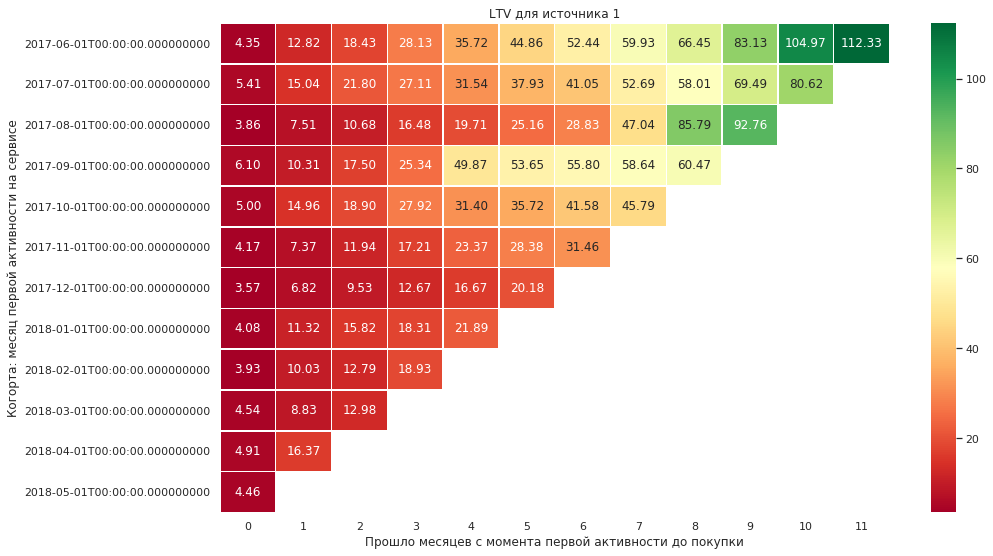

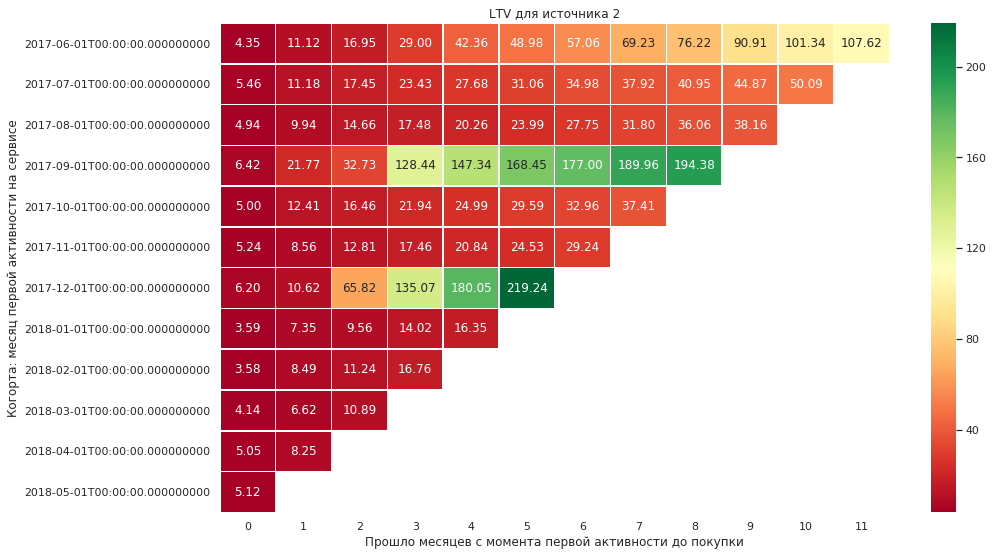

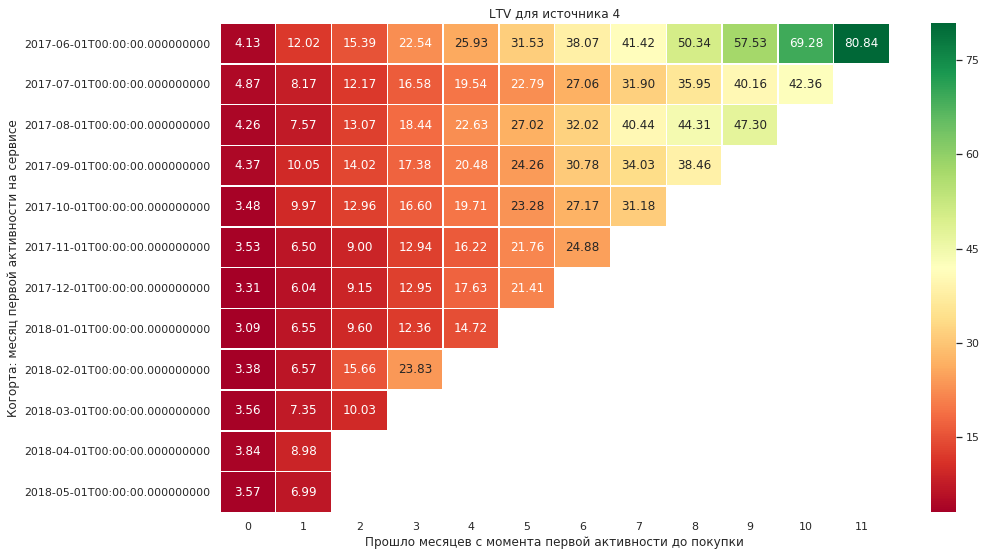

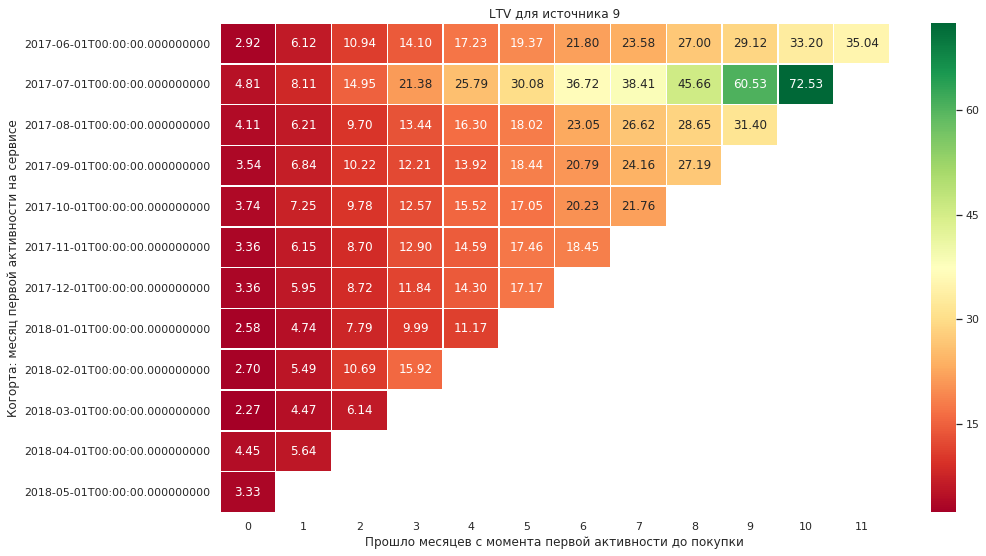

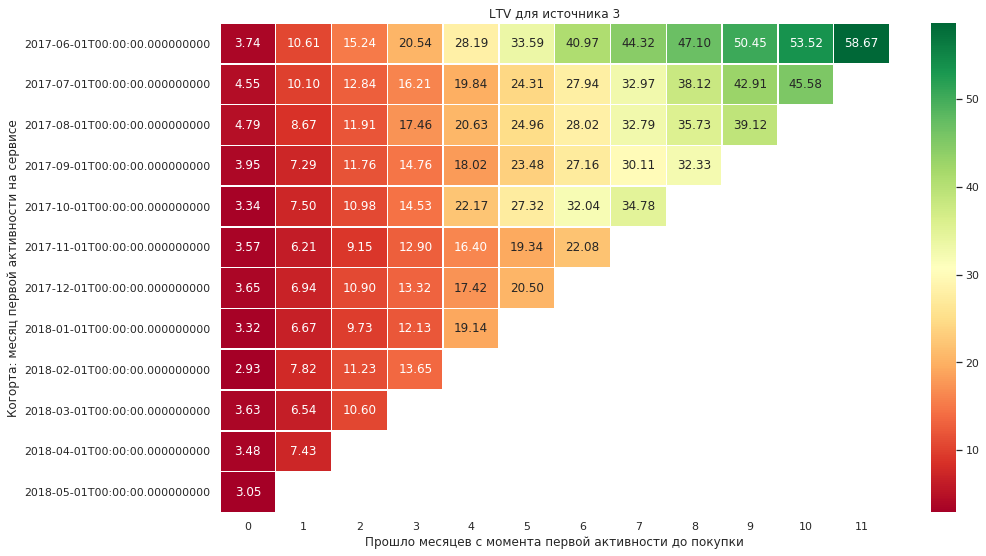

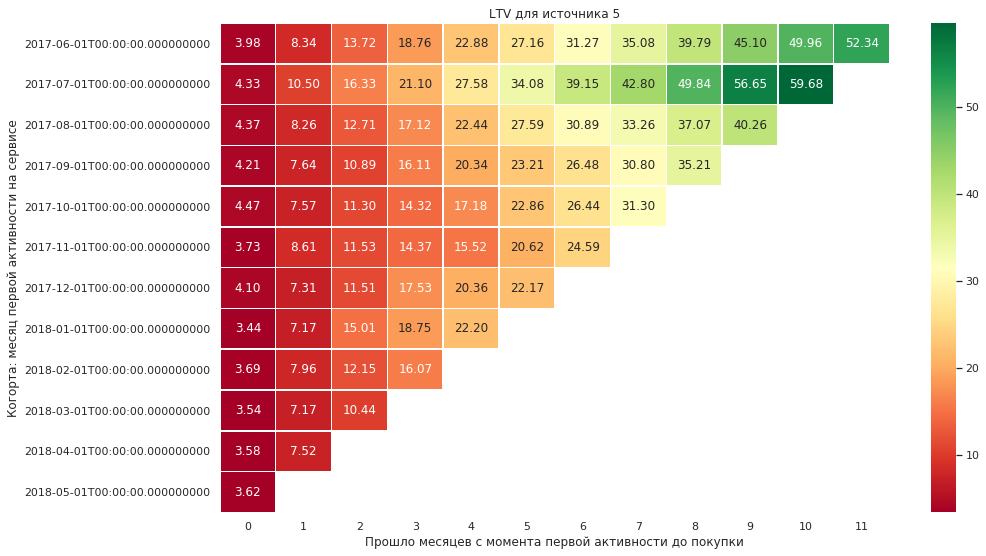

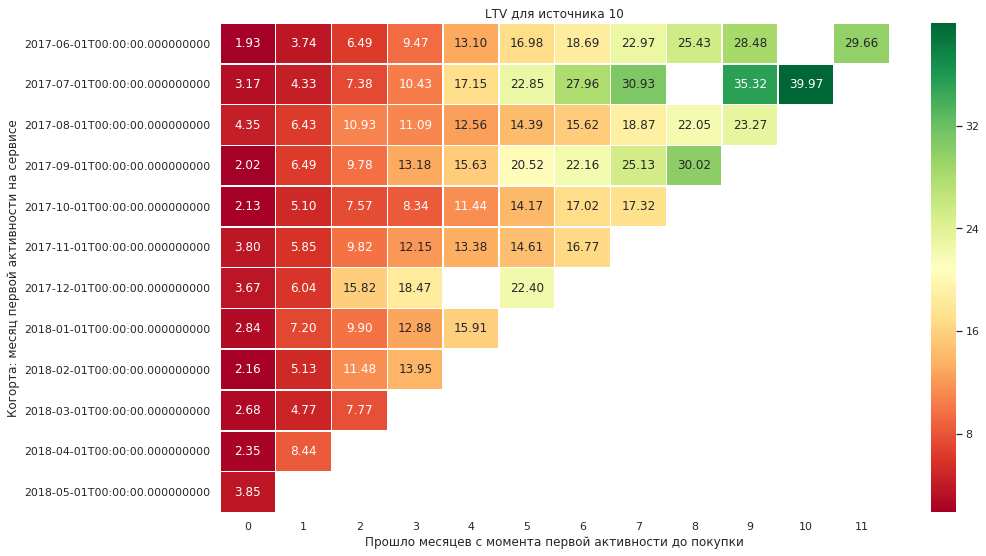

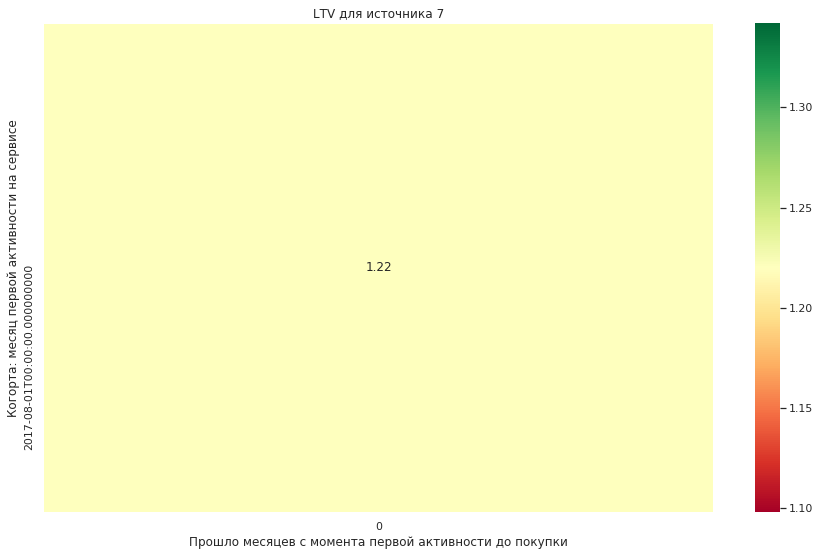

In [131]:
#  LTV по когортам от месяца первой активности до покупки в Lifiteme - месяц
for source_id in reports.source_id.unique():
    out_put = reports.query('source_id == @source_id').pivot_table(index= 'first_session_date',
        columns='age',
        values='ltv',
        aggfunc='mean').cumsum(axis=1)
    plt.figure(figsize=(15, 9))
    plt.title('LTV для источника ' + str(source_id))
    sns.heatmap(out_put, annot=True, fmt=".2f", linewidths=.5, cmap = 'RdYlGn')
    plt.ylabel('Когорта: месяц первой активности на сервисе')
    plt.xlabel('Прошло месяцев с момента первой активности до покупки')
    plt.show();

    Построим LTV по когортам (от первой покупки до повторной) и lifetime кол-во месяцев от первой покупки до повторной по всем источникам.

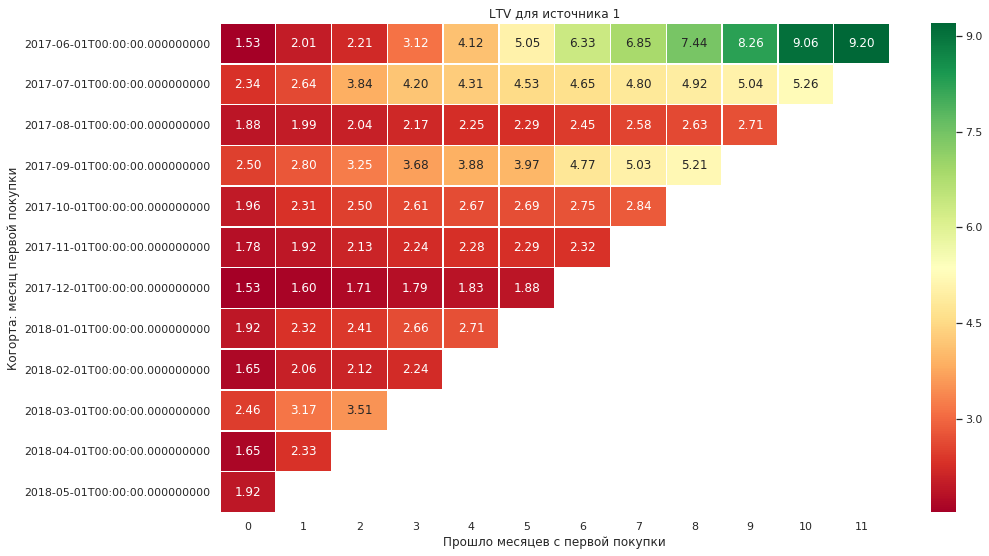

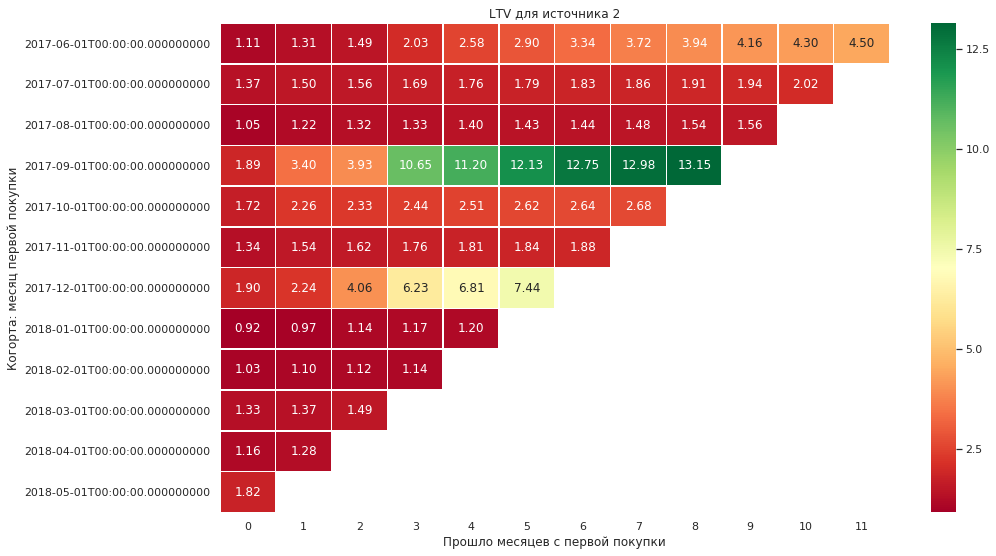

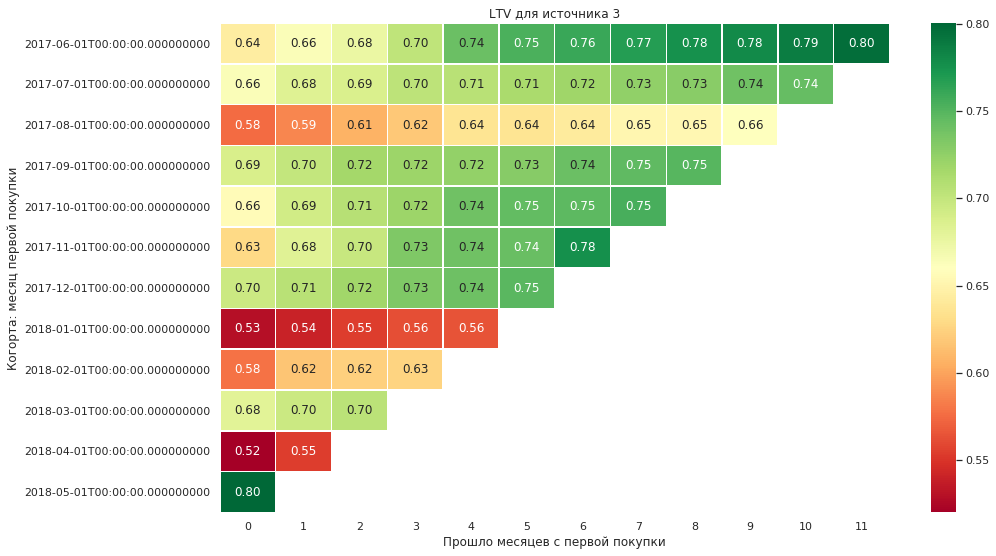

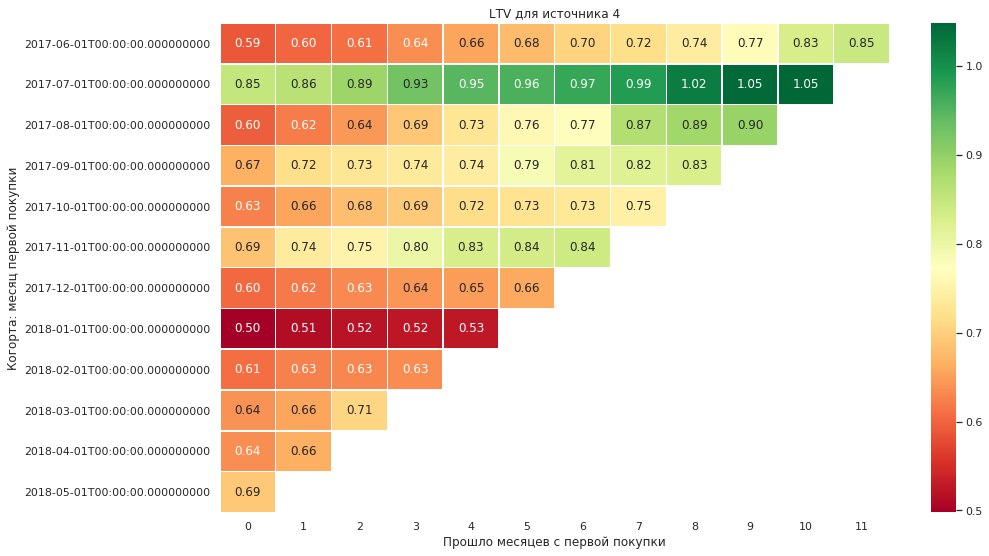

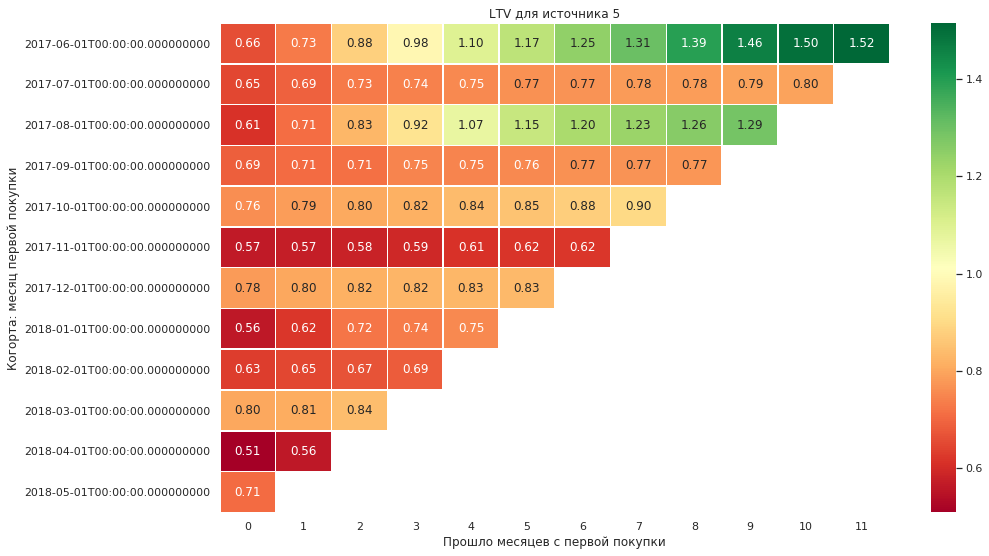

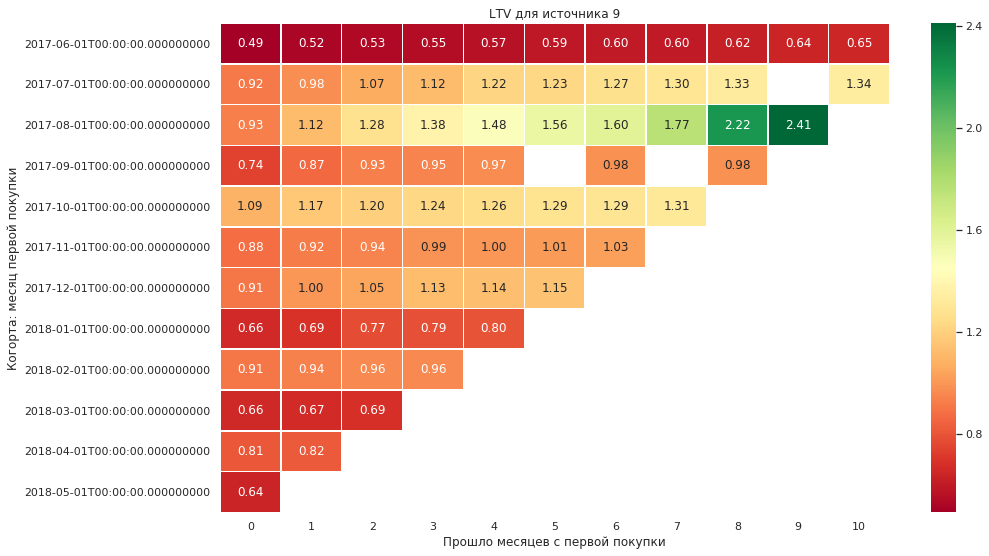

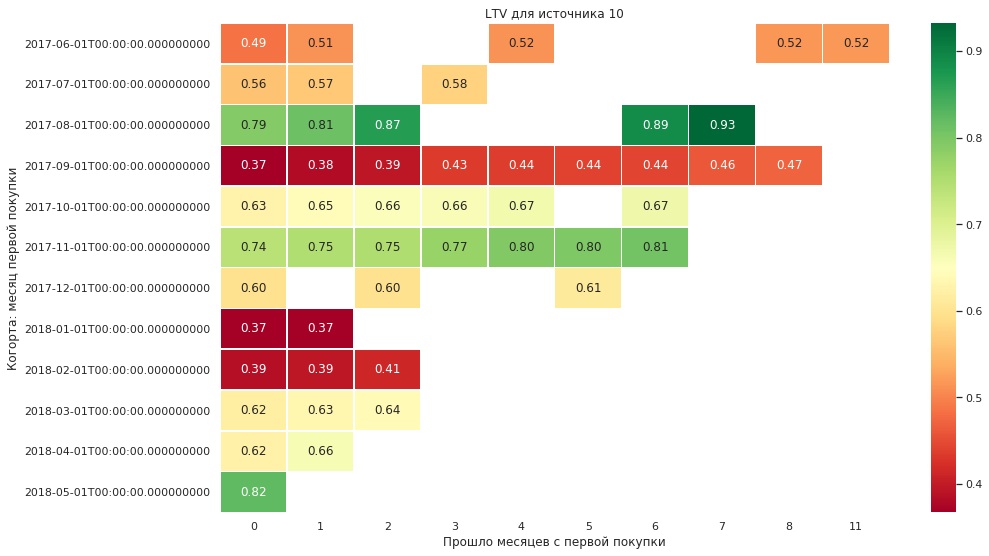

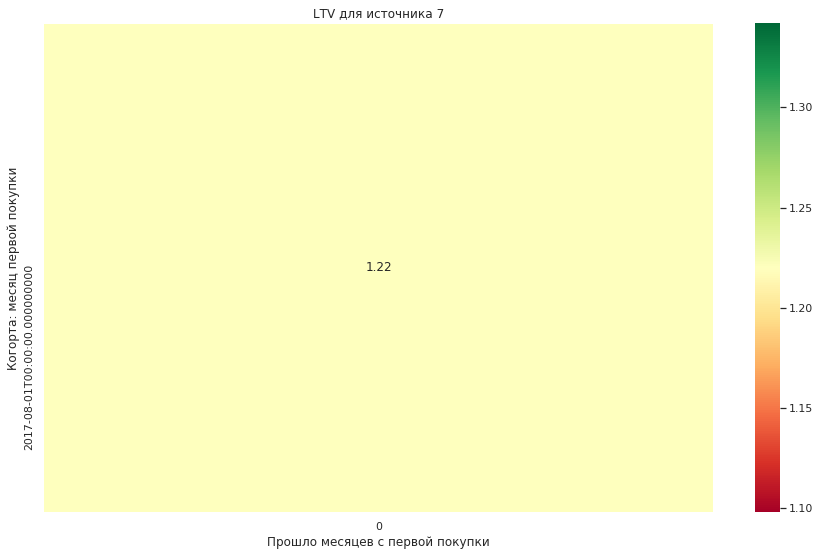

In [132]:
#  LTV по когортам от месяца первой покупки до последующей в Lifiteme - месяц
first_activity = visits.groupby('uid').agg({'start_ts': 'min', 'source_id': 'first'}).reset_index()
first_activity
 
first_activity['start_date'] = first_activity['start_ts'].astype('datetime64[M]')
 
size_cohort = first_activity.groupby(['start_date', 'source_id']).agg({'uid': 'nunique'}).reset_index()
size_cohort
 
size_cohort.columns = ['first_session', 'source_id', 'new_user']
size_cohort.head(2)
 
new_orders = pd.merge(orders, first_activity, on = 'uid')
new_orders
 
orders_first_by = orders.groupby('uid').agg({'purchase_ts': 'min'}).reset_index()
orders_first_by['first_buy_month'] = orders_first_by['purchase_ts'].astype('datetime64[M]')
orders_first_by['first_buy_date'] = orders_first_by['purchase_ts'].astype('datetime64[D]')
 
new_orders['any_buy_month'] = new_orders['purchase_ts'].astype('datetime64[M]')
new_orders['any_buy_date'] = new_orders['purchase_ts'].astype('datetime64[D]')
 
final_orders = pd.merge(new_orders, orders_first_by, on='uid')
final_orders
 
cohort_final = final_orders.groupby(['first_buy_month','any_buy_month', 'source_id']).agg({'revenue': 'sum'}).reset_index()
cohort_final.head()
cohort_final.columns = ['first_session', 'purchase_any_month', 'source_id', 'revenue']
cohort_final
 
reports = pd.merge(size_cohort, cohort_final, on=['first_session', 'source_id'])
reports 
 
reports['gp'] = reports['revenue'] * 1
reports['age'] = (reports['purchase_any_month'] - reports['first_session']) / np.timedelta64(1, 'M')
reports['age'] = reports['age'].round().astype('int')
reports['ltv'] = reports['gp'] / reports['new_user']
 
for source_id in reports.source_id.unique():
    out_put = reports.query('source_id == @source_id').pivot_table(index= 'first_session',
        columns='age',
        values='ltv',
        aggfunc='mean').cumsum(axis=1)
    plt.figure(figsize=(15, 9))
    plt.title('LTV для источника ' + str(source_id))
    sns.heatmap(out_put, annot=True, fmt=".2f", linewidths=.5, cmap = 'RdYlGn')
    plt.ylabel('Когорта: месяц первой покупки')
    plt.xlabel('Прошло месяцев с первой покупки')
    plt.show();


     Итак, самый прибыльный источник трафика является источник трафика с точки зрения накопленной выручки с клиента за весь период его жизни на сервисе является Источник № 1, Источник № 2. Здесь выделяется когорта пользователей, которые совершили первую покупку в Июне 2017 года - у них самый высокий и ьыстрорастущий LTV. Более менее доходные когорты Июля 2017 года и Января 2018 года. Источник №2 - здесь наиболее прибыльная когорта Сентября 2017 года (до 13 у.е. к концу жизни), выделяются также Июньская и Декабрьская когорты. Источник 3 (то есть клиенты, впервые совершившие покупку из этого источника) - приносит стабильно мало прибыли (меньше 1 у.е.).
     LTV из расчета когорт по месяцу первой активности и lifetime по месяцу от первой активности до покупки наиболее утишительный. Однако, мы привели его для того, чтобы визульно сравнить резульаты (LTV обычно высчитывают по когортам от месяца первой покупки). Первый вариант LTV может показать, как быстро и насколько хорошо монетизируются пользователи с момента первого визита на сервис.
 

<div style="border:solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>
Очень подробный анализ LTV🔥. Добавить нечего, все описано тобой в выводах.</div>  

##### Шаг 2.3. Метрики Маркетинга

##### Шаг 2.3.1 Сколько денег потратили? Всего / на каждый источник / по времени

    Посчитаем, сколько всего потрачено денег на маркетинг (т.е. в целом за весь период на все источники трафика), сколько потрачено на каждый источник в отдельности, посмотрим на динамику трат по источникам, чтобы определить, как менялись ориентиры бизнеса на стратегии привлечения пользователей сервиса Яндекс.Афиша. Всего на привлечение пользователей оплачено 7 источников (6, 7, 8 источники не оплачены). По крайней мере, мы располагаем данными только по представленным источникам.

Всего потрачено на маркетинг 329131.62 $

Всего потрачено на каждый из источников


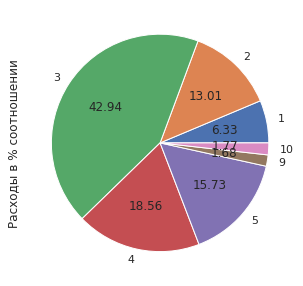

               costs
source_id           
1           20833.27
2           42806.04
3          141321.63
4           61073.60
5           51757.10
9            5517.49
10           5822.49


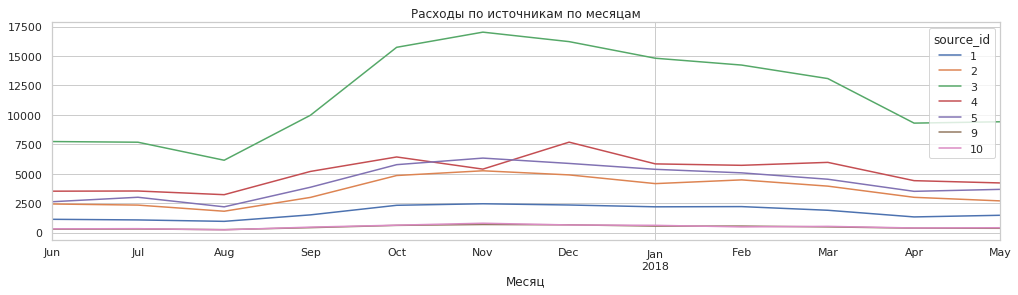

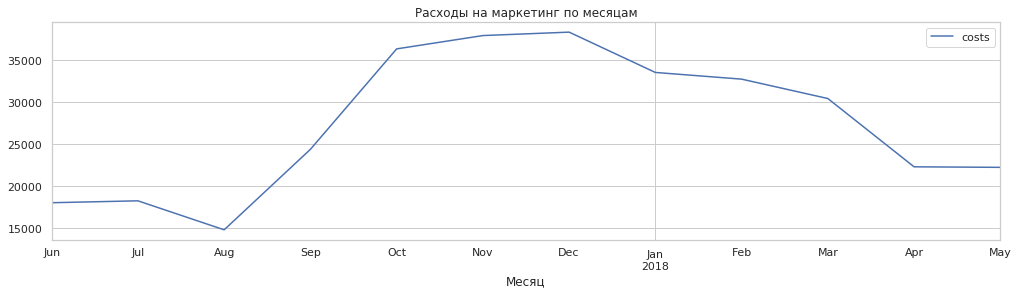

In [133]:
# Создадим столбец с месяцем каждого коста и посчитаем общую сумму
costs['cost_month'] = costs['date'].astype('datetime64[M]')
print('Всего потрачено на маркетинг {} $'.format(costs['costs'].sum()))
print('\nВсего потрачено на каждый из источников')

# Построим диаграмму соотношения трат на источники трафика в процентах
costs.groupby('source_id').sum().plot(y = 'costs', autopct='%.2f', kind = 'pie', figsize = (5, 5), legend = False)
plt.ylabel('Расходы в % соотношении')
plt.show()
print(costs.groupby('source_id').sum())


# Посмотрим на динамику трат на привлечение пользователей по месяцам
costs_pivot = costs.pivot_table(index = 'cost_month', columns = 'source_id', values = 'costs', aggfunc = 'sum')
costs_pivot.plot(figsize = (17,4), title = 'Расходы по источникам по месяцам')
plt.xlabel('Месяц')
plt.show()

# Построим линейный график динамики трат на маркетинг в целом за весь период 
costs.pivot_table(index = 'cost_month', values = 'costs', aggfunc = 'sum').plot(title = 'Расходы на маркетинг по месяцам', figsize = (17,4))
plt.xlabel('Месяц')
plt.show()

    1. Самым востребованным трафиком на привлечение (платящего) пользователя является - источник № 3 - на него потрачено 143.321 у.е. - за весь период траты на этот источник сильно выше трат на остальные. Примечательно, что радикальный рост трат на привлечение пользователей из данного источника приходится на период с Августа по Октябрь 2017 года, однако, уже в марте 2018 года мы наблюдаем постепенное снижение трат. 
    2. Для всех источников, кроме 10 и 1-го характерна положительная динамика роста вливания денег с Августа по Декабрь 2017 года
    3. На втором месте довольно заметный 4-й трафик, конкурирующий с 5-м. Пик на этот этот трафик приходится на Декабрь 2017-го года. 
    4. Самыми недооцениненными источниками являются 9-й и 10-й - за весь период в районе 5-6 у.е. вливаний.
    5. В целом, расходы на маркетинг чрезвычайно резко падают в Августе 2017 года, после чего переживают стремительный рост вплоть до октября и умеренный рост до декабря 2017 года. После мы наблюдаем постепенное падение расходов на привлечение пользователей. Разница к маю 2018 года относительно января 2017 года составляет менее 10000 у.е. Но в целом, за год вливать деньги в маркетинг стали сильно больше. Не удивительно, учитывая чрезвычайно низкий retention rate и умеренные средние чеки при довольно низкой частотности покупок. 

<div style="border:solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>
Молодец, что рассмотрел динамику маркетинговых затрат в по источникам.<br>
<ul>
<li> пункт 5, такое поведение может быть следствием годовой сезонности, о котороый мы можем судить только косвенно
<li> пункт 2, не стал бы делать таких выводов по графику с абсолютными покателями, ниже пример, где график вложений для каждого источника нормирован на свой максимум👇 Динамика сохраняется для всех источников</ul></div>  

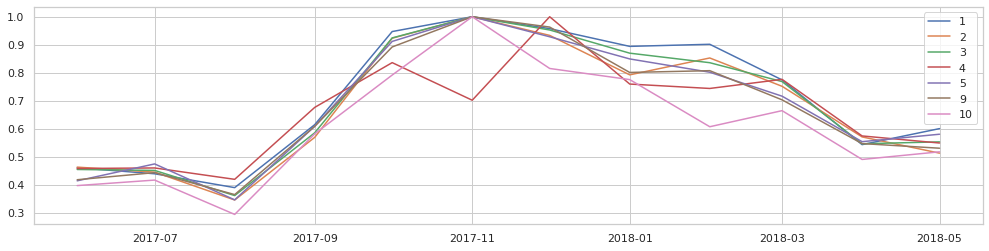

In [166]:
plt.figure(figsize=(17, 4))
for col in costs_pivot.reset_index().filter(regex=r'\d+').columns:
    plt.plot(costs_pivot.reset_index()['cost_month'], costs_pivot[col] / costs_pivot[col].max(), label=col)
    plt.grid(True)
plt.legend()
plt.show()

<hr style="border: 2px solid green;" />

##### Шаг 2.3.2  Сколько стоило привлечение одного покупателя из каждого источника?


    Стоимость привлечения одного платящего пользователя служит для общей оценки эффективности трафиков - т.е. их окупаемости.
    Для того, чтобы точно ответить на этот вопрос требуется рассчитать unit-экономику одного покупателя (в срезе по пользовательским/покупательским когортам за весь период), чтобы затем посчитать окупаемость стоимости привлечения платящего пользователя. Однако, прежде посмотрим на общую картину в оценке источников.
    Также общая и даже когортная оценка CAC и ROMI по месяцам пользовательской активности не позволяет комплексно оценить эффективность того или иного источника трафика (некоторые когорты могут не окупиться за выбранный период - эту тенденцию мы заметили на показателях LTV - высоких только 4-6 месяц всего лишь двух когорт. Здесь следует оценить конверсию по каждому источнику в покупку. Так, стоимость привлечения одного пользователя из трафика, допустим, 5, может быть довольно высокой при низком LTV когорт этого трафика, обладающим, предположим, довольно высокой конверсией - покупатели этой когорты покупают часто, но пока, закономерно, осторожно - их средний чек, как и LTV может существенно вырасти.
    Все это необходимо учесть.

In [134]:
# Выведем общие суммы затрат на источники
costs_by_source = costs.groupby('source_id').agg({'costs':'sum'})
costs_by_source.reset_index()

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [135]:
# Посчитаем количество уникальных пользователей, которые впервые пришли на сервис из конкретных источников
visits_by_source = visits.query('start_ts == first_visit')
customers_by_source = (orders.merge(visits_by_source, on='uid', how='inner')).groupby('source_id').agg({'uid':'nunique'})\
                        .rename(columns={'uid':'customers'})
customers_by_source

,customers
source_id,
1,2899
2,3506
3,10473
4,10296
5,6931
7,1
9,1088
10,1329


In [136]:
# Добавим столбец с суммарными CAC по источникам, соединив таблицы и сохранив в отдельную переменную
cac = customers_by_source.join(costs_by_source).reset_index()
cac

,source_id,customers,costs
0,1,2899,20833.27
1,2,3506,42806.04
2,3,10473,141321.63
3,4,10296,61073.60
4,5,6931,51757.10
5,7,1,NaN
6,9,1088,5517.49
7,10,1329,5822.49


In [137]:
# В данных появился редкий источник 7, с которого зашел на сервис всего лишь один пользователь. Заполним 0 - NaN.
cac = cac.fillna(0)

In [138]:
# Посчитаем расходы по пользователям 
cac['cac'] = cac['costs'] / cac['customers']
cac.sort_values('cac', ascending = False)

,source_id,customers,costs,cac
2,3,10473,141321.63,13.493901
1,2,3506,42806.04,12.209367
4,5,6931,51757.10,7.467479
0,1,2899,20833.27,7.186364
3,4,10296,61073.60,5.931779
6,9,1088,5517.49,5.071222
7,10,1329,5822.49,4.381106
5,7,1,0.00,0.000000


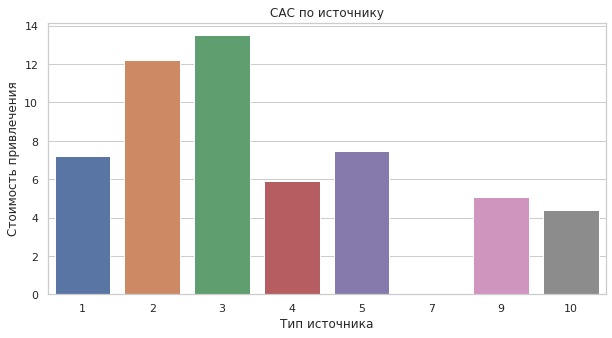

In [139]:
# Построим график 
plt.figure(figsize = (10, 5))
ax = sns.barplot(x="source_id", y="cac", data=cac)
plt.title('CAC по источнику')
ax.set_xlabel('Тип источника')
ax.set_ylabel('Стоимость привлечения')

plt.show()

     Самая высокая стоимость привлечения пользователя! приходится на 3 источник. 6,2,3,5 - выше среднего, самые незатратные источники 4,9 и 10-й.

    Посмотрим детально на распределение суммы расходов на источники привлечения пользователя по месяцам маркетинговых затрат:

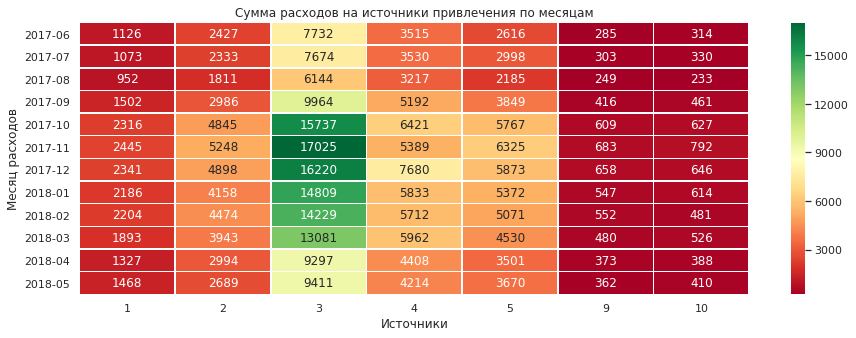

In [140]:
costs_pivot = costs_pivot.reset_index()
costs_pivot['cost_month'] = costs_pivot['cost_month'].dt.strftime('%Y-%m')
costs_pivot = costs_pivot.set_index('cost_month')

plt.figure(figsize=(15, 5))
plt.title('Сумма расходов на источники привлечения по месяцам')
sns.heatmap(costs_pivot, annot=True, fmt=".0f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Источники')
plt.ylabel('Месяц расходов')
plt.show()

    Из графика видно, что самым дорогим источником привлечения трафика является № 3 (с экстримально высокими затратами до 17000 у.е. в ноябре 2017 г.) и № 4 (до 7680 у.е. в декабре 2017 года), в то время как последний является наименее дорогим с перспективы стоимости привлечения 1-го пользователя CAC, а первый - остается самым дорогим! 1-й трафик также относится к 3-ке наименее оплачиваемых в динамике за 1 год, между тем, у него также один из самых низких показателей стоимости привлечения одного пользователя.

    Посчитаем количество уникальных пользователей, которые приходили из разных источников в сервис Яндекс.Афиша. Чаще всего в сервис приходят из источника № 1 (с большим отрывом - более 50% пользователей), а также источника № 2 (1/10 пользователей)

In [141]:
print('Кол-во пользователей приходивших в сервис по разному кол-ву источников:')
print(visits.groupby('uid').agg({'source_id':'nunique'})['source_id'].value_counts())

Кол-во пользователей приходивших в сервис по разному кол-ву источников:
1    190449
2     28642
3      6792
4      1761
5       442
6        74
7         9
Name: source_id, dtype: int64


    Посмотрим на процентное соотношение пользователей конвертирующихся в просмотр ресурса Яндекс.Афиша из разных источников для того, чтобы взесить вклад каждого источника в осуществлении трафика на сервис (потому что первый анализ всего лишь частотный):

In [142]:
visits_sources_none = visits[['uid', 'start_ts', 'end_ts', 'first_visit', 'source_id']]

In [143]:
sources_all_visits = visits_sources_none.pivot_table(index = 'uid', columns = 'source_id', values = 'start_ts', aggfunc = 'count')
sources_all_visits = sources_all_visits.fillna(0)
sources_all_visits = sources_all_visits.astype('int')

for i in range(1,11):
    try:
        print('Источник source_{} - используется {:.1%} пользователями'.format(i, sources_all_visits[i].mean()))
    except:
            print('Источник source_{} - используется 0.0% пользователями'.format(i))

Источник source_1 - используется 15.0% пользователями
Источник source_2 - используется 20.9% пользователями
Источник source_3 - используется 37.5% пользователями
Источник source_4 - используется 44.6% пользователями
Источник source_5 - используется 29.3% пользователями
Источник source_6 - используется 0.0% пользователями
Источник source_7 - используется 0.0% пользователями
Источник source_8 - используется 0.0% пользователями
Источник source_9 - используется 5.8% пользователями
Источник source_10 - используется 4.4% пользователями


        Итак, несмотря на то, что наиболее популярный 1-й источник, чаще всего пользователи конвертируются в просмотр - первичную активность на сервисе - с источника № 4 (44.6%  пользователей), на втором месте (почти 37.5%) - источник № 3. Именно в 3-й источник вливается больше всего денег за 1 год, в то время как 4-й источник в данной метрике наиболее перспективный, однако расходы на него довольно близки расходам на другие - наименее эффективные источники трафика. Любопытно, что при этом, в рамках предварительного анализа по всем логам, представленному выше, 4-й источник является одним из самым не дорогим по стоимости привлечения пользователя, в то время как источник 3 - одним из самых дорогих (примерно 6 и 13.5 у.е. соответственно!). 1 - й трафик остается одним из самых низких по CAC в условиях всего 15% обеспечения трафика сервиса. На него также следует обратить внимание, как и на источник 4.
        
        Источники 6,7,8  практически совсем не используются для входа на ресурс - видимо поэтому расходов на данные типы трафика мы не наблюдаем в маркетинговом бюджете. 

        Теоретически, мы не можем учитывать только источник первого посещения или источник по которому совершили саму покупку для определения ценности источников, поэтому мы будем учитывать все источники перехода на сервис, но в %-ном соотношении, при этом мы не станем привязываемся к месяцу покупки, так как в нашем расчете мы будем использовать только те посещения, которые в конечном счете привели к покупке.
        Для того, чтобы качественно оценить маркетинговую перспективу различных исчтоников трафика с целью преоритизации рекламных расходов, выведем когортный срез (когорты по месяцам маркетинговых инвестиций в трафик) для каждого источника в кадре средней стоимости привлечения одного пользователя.
        Для этого: 1) отберем те сессии, которые закончились покупкой, 2) посчитаем количество сессий в срезе источников и разделим стоимость привлечния суммарную за каждый период на кол-ва уникальных пользователей в каждой сессии

In [144]:
visits_for_buy = visits[['end_ts', 'start_ts', 'uid', 'source_id', 'first_visit', 'first_visit_month']]
orders_for_buy = orders.groupby('uid').agg({'purchase_ts': 'min'}).reset_index()
visits_for_buy_2 = visits_for_buy.merge(orders_for_buy, on='uid')

In [145]:
visits_for_buy_2
#напишем функцию проверки сессий на факт покупки
def what_session(row):
    if row['start_ts']<=row['purchase_ts']<=row['end_ts']:
        return True
    else:
        return False

#найдем сессии в которые совершили покупки
visits_for_buy_2['buy_session'] = visits_for_buy_2.apply(what_session, axis = 1)

In [146]:
visits_for_buy_2['ts_month'] = visits_for_buy_2['start_ts'].astype('datetime64[M]')
uid_first_source = visits_for_buy_2.groupby('uid').agg({'buy_session':'sum','start_ts':'min','source_id':'first', 'ts_month':'first'})


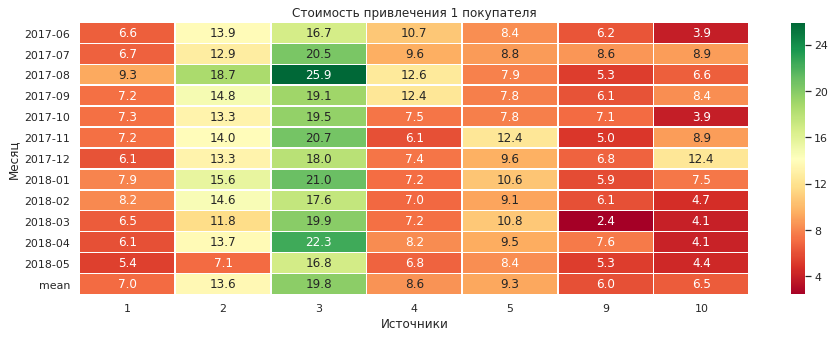

In [147]:
number_purchases = uid_first_source.pivot_table(index = 'ts_month', columns = 'source_id', values = 'buy_session', aggfunc = 'sum')
number_purchases = number_purchases[[1, 2, 3, 4, 5, 9, 10]]

cost_one_buyer_by_sources = pd.DataFrame()
for i in range(1,11):
    try:
        cost_one_buyer_by_sources[i] = costs_pivot[i] / number_purchases[i]
    except:
        continue
cost_one_buyer_by_sources.loc['mean'] = cost_one_buyer_by_sources.mean()
cost_one_buyer_by_sources

plt.figure(figsize=(15, 5))
plt.title('Стоимость привлечения 1 покупателя')
sns.heatmap(cost_one_buyer_by_sources, annot=True, fmt=".1f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Источники')
plt.ylabel('Месяц')
plt.show()

    Итак, посмотрим на стоимость привлечения пользователей в перерасчете по месяцам и сессиям, которые реально привели к покупке.
    1. Самый дорогой источник трафика №3 по всем месяцам пользовательской активности. Однако, с Января по Март стоимость привлечения 1-го пользователя заметно просела. 
    2. Перспективный источник № 1 оказался чуть более дорогим, чем видилось на общих данных, в Августе 2018 года расходы на него обошлись почти в 9.3 у.е., что относит его уже на 3-е место по дороговизне трафика. 
    4. Тоже самое касается перспективного по монетизации трафика № 4., да, в среднем 5-я строка рейтинга по затратам (около 6.у.е.), однако в перерасчете по месяцам и по сессиям, которые привели к реальной покупке, стоимость этого трафика заметно выше и в среднем составляет 8.6 у.е., особенно сильно расходы на привлечения пользователя у него летом и в начале осени 2017 года. 
    5. 2-й трафки (2-й по стоимости привлечения в целом одного пользователя и 4-й по рмаркетинговым расходам) оказался в перерасчете относительно дешевым - в среднем врайоне 12 у.е. -  за май 2018 данные не смотрим - их слишком мало. 
    6. 5-й трафик, на который приходится около 30% пользователей на посещение сервиса и занимающий 3-ю строчку по общим CAC, в перерасчете - совсем не дорогой. Максимальных значений по расходам на привлечение он достиг лишь в Январе 2018 года, однако, проседал до 7.8
    7. Примечательно, что в перерасчете, один из самых неэффективных источников № 9 (охватывающий аудиторию в почти 6% пользователей) и "сжирающий" в среднем около 5 у.е. - просел еще ниже - и в среднем увеличился до 6 за сессию, приводящую к покупке. 

    Для того, чтобы косвенно по всем клиентам оценить эффективность источников трафика в конверсии в покупку зададим еще одно условие для того, чтобы отобрать сессии, в которых была совершена покупка

In [148]:
visits_for_buy_2
def before_first_purchase(row):
    if row['start_ts'] <= row['purchase_ts']:
        return True
    else:
        return False
visits_for_buy_2['before_first_purchase'] = visits_for_buy_2.apply(before_first_purchase, axis = 1)

In [149]:
# Отсортируем по условию 
visits_purchase = visits_for_buy_2[visits_for_buy_2['buy_session'] == True]
sources_first_purchase = visits_purchase.pivot_table(index = 'uid', columns = 'source_id', values = 'before_first_purchase', aggfunc = 'sum')
sources_first_purchase = sources_first_purchase.fillna(0)
sources_first_purchase = sources_first_purchase.astype('int')

for i in range(1,11):
    try:
        print('Источник source_{} - используется ВО ВРЕМЯ ПОКУПКИ {:.1%} пользователями'.format(i, sources_first_purchase[i].mean()))
    except:
            print('Источник source_{} - используется ВО ВРЕМЯ ПОКУПКИ 0.0% пользователями'.format(i))

Источник source_1 - используется ВО ВРЕМЯ ПОКУПКИ 12.6% пользователями
Источник source_2 - используется ВО ВРЕМЯ ПОКУПКИ 10.5% пользователями
Источник source_3 - используется ВО ВРЕМЯ ПОКУПКИ 24.6% пользователями
Источник source_4 - используется ВО ВРЕМЯ ПОКУПКИ 26.1% пользователями
Источник source_5 - используется ВО ВРЕМЯ ПОКУПКИ 20.6% пользователями
Источник source_6 - используется ВО ВРЕМЯ ПОКУПКИ 0.0% пользователями
Источник source_7 - используется ВО ВРЕМЯ ПОКУПКИ 0.0% пользователями
Источник source_8 - используется ВО ВРЕМЯ ПОКУПКИ 0.0% пользователями
Источник source_9 - используется ВО ВРЕМЯ ПОКУПКИ 2.0% пользователями
Источник source_10 - используется ВО ВРЕМЯ ПОКУПКИ 3.6% пользователями


    Итак, мы видим, что подавляющее большинство (почти 1/3 пользователей) конвертируются в покупку, заходя на сервис из Источника № 4 - здесь он снова зарекомендовал себя как наиболее эффективный. Однако, наиболее обеспеченный с точки зрения вливания денег трафик №3 - далеко не самый эффективный. Не менее примечательно, что недооцененный маркетинговой командой Источник № 1 - также обладает довольно высокой конверсией в покупку. Не менее интересная ситуация и с довольно дорогим Источником № 5 - он обеспечивает около 21% транзакций.
    

##### Шаг 2.3.3 На сколько окупились расходы ROI

    Прежде, чем приступить к рассчету CAC по источникам и в течение жизни клента от первой покупки, выведем ROI по когортам (от первой покупки до повторной) по всем источникам трафика

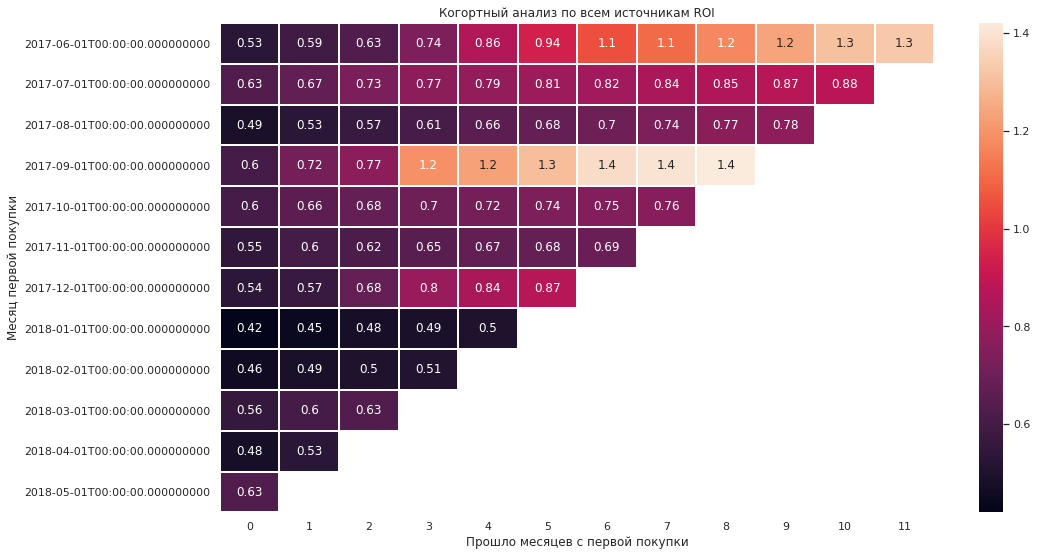

In [150]:
cost_per_month = costs.groupby('cost_month')['costs'].sum().reset_index()
report_new_costs = pd.merge(report, cost_per_month, left_on='first_order_month', right_on='cost_month')
report_new_costs['cac'] = report_new_costs['costs'] / report_new_costs['n_buyers']
# Посчитаем ROMI 
report_new_costs['romi'] = report_new_costs['ltv'] / report_new_costs['cac']
output_new = report_new_costs.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

output_new.cumsum(axis=1).round(2)


sns.set(style = 'whitegrid')
plt.figure(figsize = (16, 9))
plt.title('Когортный анализ по всем источникам ROI')
ax = sns.heatmap(output_new.cumsum(axis=1).round(2), annot=True, linewidths=1, linecolor='white')

plt.xlabel('Прошло месяцев с первой покупки')
plt.ylabel('Месяц первой покупки')
plt.show()

In [151]:
# Выведем средние значения ROI по всем когортам 
output_new.cumsum(axis=1).mean(axis=0)

age
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

    Итак, 
    1. Почти все когорты по всем источникам трафика окупаются или близки к этому на 8-й месяц после первой покупки.
    2. Наиболее окупаемыми когортами являются, как и в случае с LTV, пользователи, пришедшие на сервис в Июне 2017 года и Сентябре 2017 года. Также эти когорты быстрее всех других пользователей окупаются: Лидер - когорта Сентября 2017 - уже на 3-й месяц после первой покупки, в то время как когорта Июня 2017 года - на 6-й месяц (однако уже близка к окупаемости на 4,5-й месяц. 
    3. На втором месте по окупаемости (по аналогии с LTV) пользователи, впервые купившие на сервисе Июле, Августе 2017-года и неожиданно в Декабре 2018 года - несмотря на довольно низкий LTV этой декабрьской когорты, она демонстрирует наиболее качественные показатели по окупаемости стоимости привлечения одного пользователя. Любопытно, что клиенты этой когорты близки к окупаемости уже на 4-йб 5-й месяц после первой покупки. 
    4. Наименее окупаемые когортами являются те, пользователи которых впервые совершили покупку на сервисе с начала 2018-года - с января по май. Следует обратить внимание на рекламные расходы по привлечению пользователей из разных источников трафика за 2018 год или повышать конверсию - искать узкое место воронки / проблемы с конвертацией в покупку.
    5. Увы, почти все когорты, так или иначе, не окупаются - сервис зарабатывает на комиссии и на рекламе, в то время как низкие средние чеки и доход на платящего пользователя в купе с довольной невысокой частотностью покупок и низким коэффициентом удержания пользователей - дают о себе знать. 
    
    Выведем еще несколько графиков в срезе по девайсам для уточнения будущей гипотезы относительно конверсий в покупку и стоимости заказаов, а также посмотрим на окупаемость пользователей по разным источникам трафика:

In [152]:
# Рассчитаем общий ROMI по всем клиентам за год в срезе по источникам. Так делать нельзя, но это позволит оформить общее представление
costs_by_source.reset_index()
revenue_by_source = (orders.merge(visits_by_source, on='uid', how='inner')).groupby('source_id').agg({'revenue':'sum'})
revenue_by_source.reset_index()
roi = revenue_by_source.join(costs_by_source)
roi['roi'] = (roi['revenue'] - roi['costs']) / roi['costs']
roi.sort_values('roi', ascending = False).reset_index()

,source_id,revenue,costs,roi
0,1,31090.55,20833.27,0.492351
1,2,46923.61,42806.04,0.096191
2,9,5759.40,5517.49,0.043844
3,5,52624.02,51757.10,0.016750
4,4,56696.83,61073.60,-0.071664
5,10,4450.33,5822.49,-0.235665
6,3,54511.24,141321.63,-0.614275
7,7,1.22,NaN,NaN


    Мы видим, что на весьма предварительным уровне по суммарным расходам и доходам по всем пользователям с каждого источника, положительными являются лишь 4: 1,2,9 и 5-й - остальные - не окупаются вообще. Примечательно, что несмотря на любимый маркетологами источник 3 - его окупаемость отрицательная за весь период, в целом, как и у источника 4, несмотря на широкую адиторию ежемесячных уникальных пользователей, которую он формирует. Между тем, опять же, положительным образом выделяется Источник № 1 ! При своей довольно низкой стоимости привлечения пользователя (CAC) - в районе 7 у.е. и довольно широким охватом адитории - 15% пользщователей попадают впервые на сервис из этого источника, он обладает еще и невероятно высокой окупаемостью - 0.49, почти 50%! Маркетологам следует обратить внимание реструктуризацию маркетинговых расходов по источникам!
    
    Посмотрим на общие доходы по источникам в срезе девайсов, с которых покупают клиенты, а затем посчитаем ROI по источникам трафика в срезе по когртам от даты первой покупки.

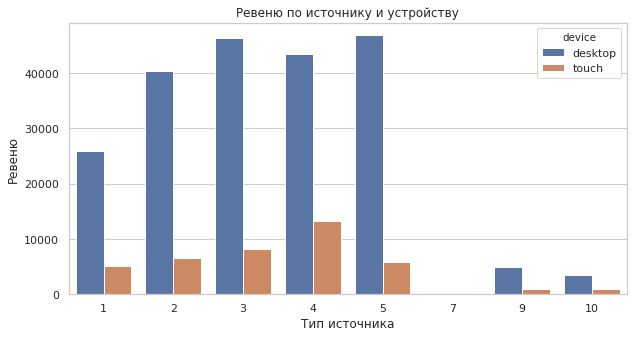

In [153]:
revenue_by_source_and_device = (orders.merge(visits_by_source, on='uid', how='inner'))\
                                .groupby(['source_id', 'device']).agg({'revenue':'sum'}).reset_index()
                                
plt.figure(figsize = (10, 5))
ax = sns.barplot(x="source_id", y="revenue", hue="device", data=revenue_by_source_and_device)
plt.title('Ревеню по источнику и устройству')
ax.set_xlabel('Тип источника')
ax.set_ylabel('Ревеню')
plt.show()                               

        Итак, самым доходным из ПК источником являются №3 и №5, а среди гаджетов - №4. Возможно, маркетологам и разработчикам следует обратить внимани мобильные приложения сервиса и подтянуть перспективный источник № 4 по укапаемости. 
        
        Посмотрим на окупаемость пользователей разных источников по когортам от первой покупки. В идеале (в реальной работе) мы бы смотрели на источник именно первой покупки. Источник сессии в которую эта покупка была совершена. В проекте у нас нет возможности узнать этой информации, поэтому мы предлагаем вариант, как сделать допущение при получении первого источника. Можно отсортировать по start_ts и взять первый источник. 

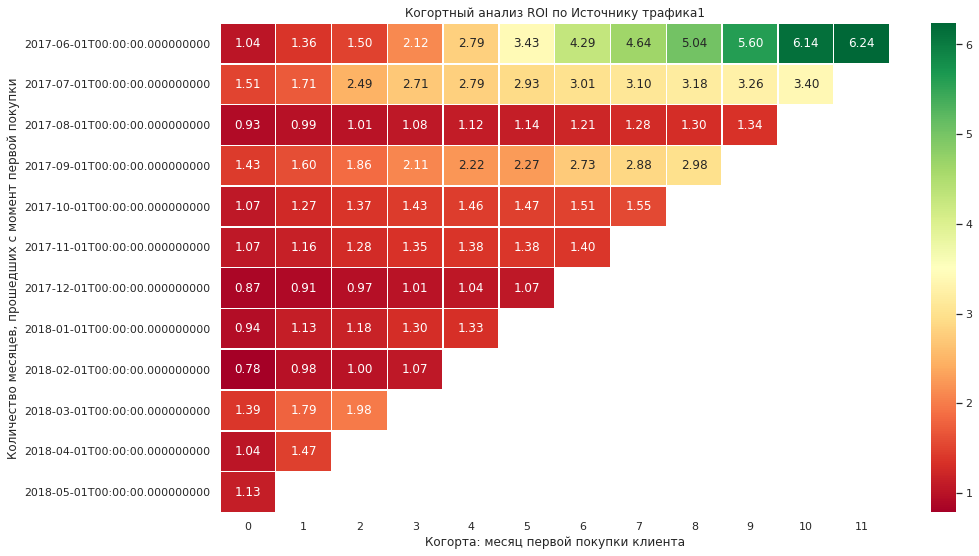

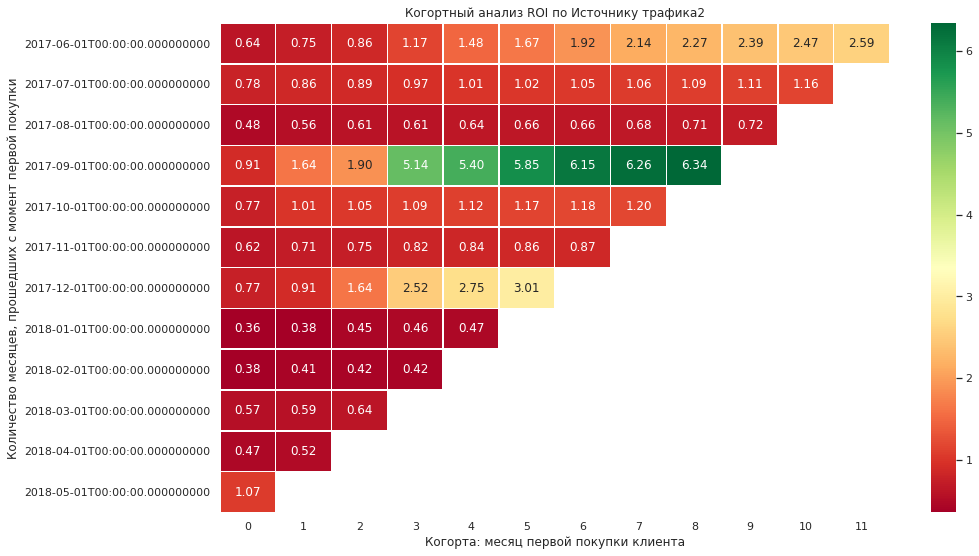

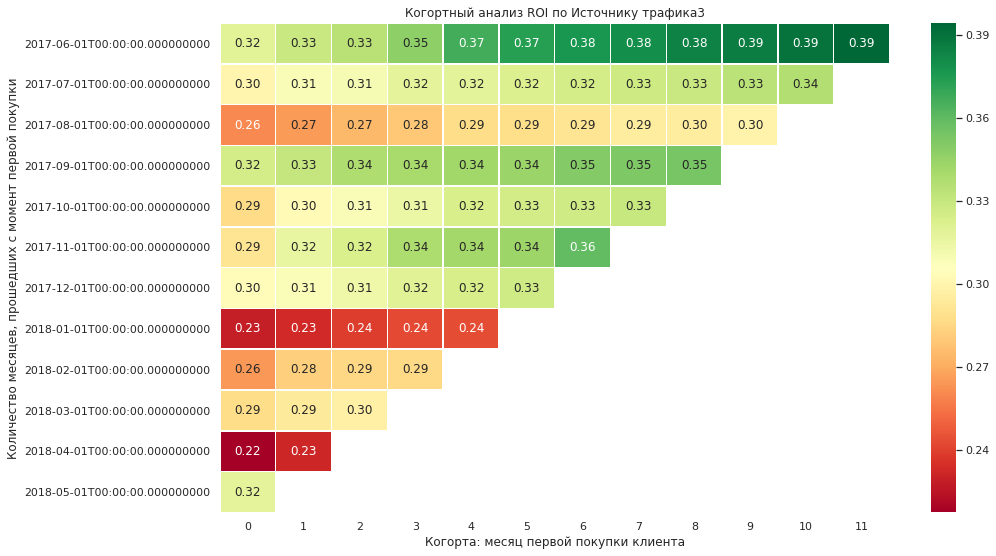

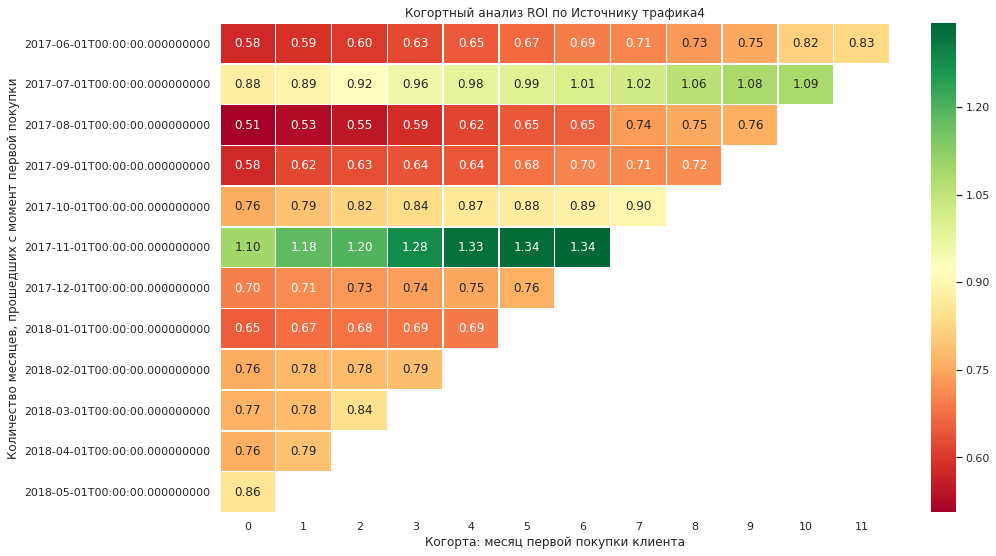

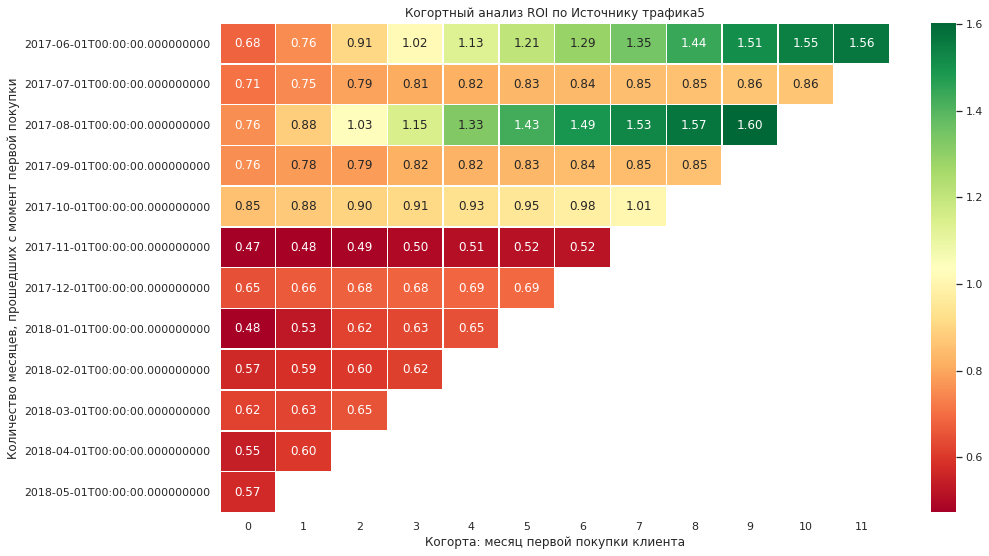

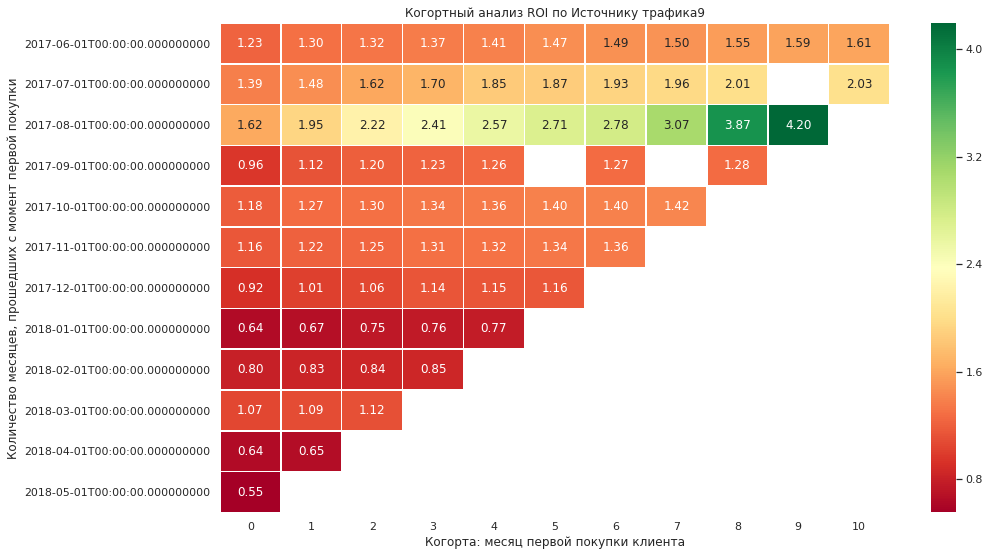

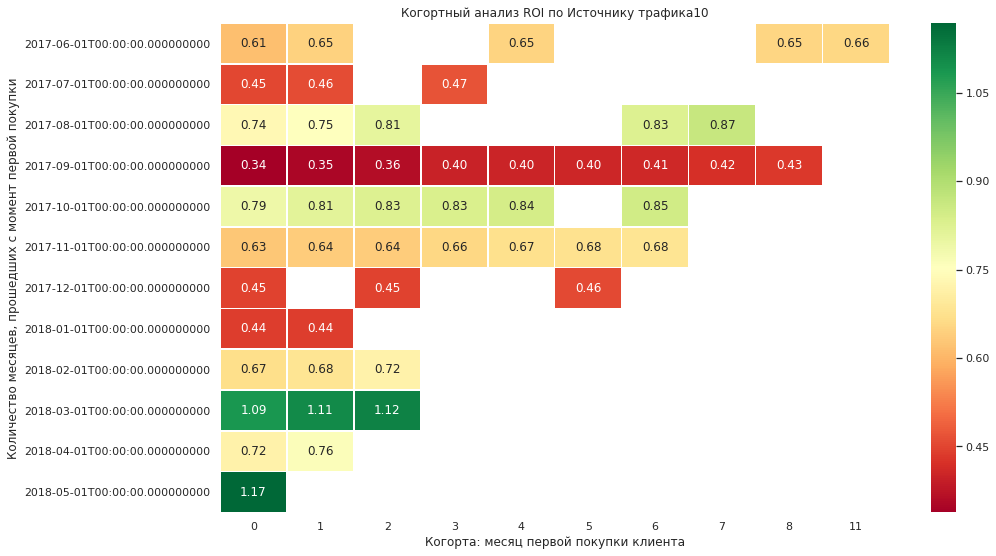

In [167]:
# Создадим для облегчения задачи дополнительный столбец с названием месяца платяжа - совпадающего с названием месяца когорт
costs['first_session'] = costs['cost_month']
costs_per_source = costs.groupby(['source_id', 'first_session']).agg({'costs': 'sum'}).reset_index()
# Добавим в полученную нами таблицу на этапе рассчета LTV по когортам и возрастам столбец с костами
report_roi = reports.merge(costs_per_source, on=['source_id', 'first_session'])

# Расччитал CAC, ROMI 
report_roi['cac'] = report_roi['costs'] / report_roi['new_user']
report_roi['romi'] = report_roi['ltv'] / report_roi['cac']

#  Выведем heatmap по источникам и когортам (от первого месяца покупки)
for source_id in report_roi.source_id.unique():
    out_put = report_roi.query('source_id == @source_id').pivot_table(index= 'first_session',
        columns='age',
        values='romi',
        aggfunc='mean').cumsum(axis=1)
    
    plt.figure(figsize=(15, 9))
    plt.title('Когортный анализ ROI по Источнику трафика' + str(source_id))
    sns.heatmap(out_put, annot=True, fmt=".2f", linewidths=.5, cmap = 'RdYlGn')
    plt.ylabel('Количество месяцев, прошедших с момент первой покупки')
    plt.xlabel('Когорта: месяц первой покупки клиента')
    plt.show();

    Итак, из когортного анализа ROI по каждому источнику мы можем сделать следующие вывод:
    
        1. Фактически 50% - я окупаемость Источника № 1 обеспечивается за счет, в основном, первой когорты Июнь 2017 года.
        2. Фактически все источники трафика окупается в месяц первой покупки. Во-первых, как мы уже отметили, продажи на сервисе "теплые" - большинство клиентов покупают как минимум в первый день, а в большинстве случаев - в период до 30-40 минут. Во-вторых,  следует отметить, что на качество когортного анализа ROI по источникам отразилась специфическая группировка клиентов в когорты по двум параметрам - первый месяц покупки и первый источник, с которого пользователь впервые зашел на сайт/приложение. Нас не интересует, что юзер через месяц пришел из другого источника,  впервые он зашел из источника номер 1 в такой-то месяц и мы хотим понять, как он перформил дальше). Мы уже говорили, что это не совсем адекватный способ сегрегации пользователей для лонгитьюдной оценки эффективности источников. Однако, он позволяет дать предварительную оценку качества источников трафика и некоторых дополнительных особенностей поведенческой активности.
        3. Посмотрим на срез по когортам и каждому источнику: 1) Источник № 2 - несмотря на свой отрицательный ROI довольно хорошо  окупается когортой тех пользователей, которые впервые зашли на сервис с этого источника в Сентябре 2017 года (в Декабре у клиента этой когорты невероятно высокий ROI - 3.2. Неплохо перформит и когорта Января 2018 года, в довольно стабильной окупаемости за 4 месяца от 0.75 до 0.88 в среднем. 2) Источник № 9 - несмотря на свою довольно низкую окупаемость (ROI - в среднем около 4%), в основном первоформит за счет опять же Январской когорты 2018 года -  за счет клиентов которых обеспечивает свою хоть какую-то монетизацию. У клиентов этой когорты коэффициент варьируется от 0.14 до 0.8 к лету 2018 года. 
        4. По всем источникам самый высокий уровень окупаемости маркетинговых вложений на привлечение платящего пользователя мы наблюдаем на 6-й и 8-й, редко 3-й месяц после первой покупки, что, в общем, оставляет открытым вопрос относительно лояльности аудитории и скорее репрезентирует специфику продукта - событийную сезонность спроса на услуги сервиса. 
        
    Итак, два важных вывода: 
        1. Из первой тройки окупающся за год источников № 1 (49%), №2 (10%), №9 (4%) прогнозы не утишительные: в основном эти источники монетизируются за счет самых покупаемый первых клиентов первой когорты - лета 2017 года и НОВОГОДНИХ клиентов конца года. По другим когортам мы наблюдаем тревожную тенденцию девальвации покупательной способности. 
        2. В некоторых случаях общий положительный ROI обеспечивается за счет многократных покупок ПРЕДНОВОГОДНИХ и ПРАЗДНИЧНЫХ когорт (например, что касется источника № 2 - Сентябрьская когорта обеспечила абсолютный рекорд по окупаемости в Декабре 2017 года - 3.2. Это говорит о том, те, кто впервые пришел из этого источника за несколько месяцев может радикально окупиться в праздничные дни. 
        3. Стабильности в окупаемости в месяцы после первой покупки практически нигде не наблюдается.
            
    Анализ актуализировал запрос на обследование потребительского поведения клиентов в срезе ресурсов, заход на сервис с которых обеспечивает транзакцию. Здесь мы бы могли взвешенно оценить метрики конверсии источников, потребительские установки относитель источников, а также узнать, есть ли какие-то потребительские установки, аттитюды относительно источников трафика, которые обеспечивают его специфическую сезонную конверсию (например, с каких источник пользователь, посещающий сервис, чащей осуществляет покупки в Новогодные Праздники или "выходные дни"). 
            
        

<div style="border:solid orange 2px; padding: 20px"> <b>Что можно улучшить 2</b><br>
Потерялся <code>cumsum</code> при исследовании ROI по истоникам, вывод надо будет поправить</div>  

###  Общий вывод

###### Как пользуются продуктом
        Сервисом пользуются крайне редко (низкий уровень удержания или возврата пользователей). В среднем на одного пользователя приходится 1.58 сессий. Данный показатель подтверждает то, что сервисом пользуются редко.
        В пользовании Яндекс.Афиша можно отметить лишь событийную сезонность, когда на некоторые конкретные даты возрастает активность клиентов и увеличиваются конверсии в продажу. Несмотря на то, что традиционная "недельная"  сезонность "выходного дня" также присутствует, но очень блазирована и судя по данным, определяющая монетизцию пользователей. Дневная пользовательская активность за год-за весь период- (DAU), в среднем: 908 человек. Недельная пользовательская активность за весь период (WAU), в среднем: 5716 человек. В данных мы заметили экстремально высокий скачок на уровне дневной пользовательской активности в 2.5 раза (это конец Ноября 2017 года). Необычный спрос на ресурс в этих числах сложно объяснить, однако, и, забегая вперед, маркетинговые расходы к концу года также существенно выросли. Ноябрь нельзя отнести к сезону спроса на развлекательные услуги и просветительские программы, здесь работает ситуативный ангажированный спрос - который, конечно, нужно тестить вместе с гипотезой об увеличении рекламных средств на привлечение пользователей. В целом, что касается месячных показателей прихода уникальных пользователей (MAU), то с конца сентября по конец декабря (если не учитывать всплеск активности в конце Ноября) - этот показатель довольно стремительно растет и выводит до лета 2018 года посещаемость сервиса на отметку уверенно выше среднего. При этом, самое драматичное падаение  пользовательской активности сервис пережил в Августе 2017 года (забегая вперед, одном из самых окупаемых месяцев за весь период). 
        Покупки в основном совершаются при вервом посещении. Здесь важно отметить, что большинство пользователей конвертируются в покупки в течение 1 минуты после захода на сервис. Медиана времени с первой сессии до первой покупки: 16 минут. Среднее время с певрой сессии до первой покупки: 16 дней. Мода времени с певрой сессии до первой покупки: 1 минута. Что же касается продолжительности времени, проведенном на сервисе, то чаще всего пользователи проводят на сервисе Яндекс.Афиша 1.00 минуту. Одна сессия длится в среднем 10.72 минут, в медианном 5 минут, в модe 1 минуту. Примечательно, что большая часть пользователей на границе с статистической погрешностью находится на сервисе максимум 32 минуты единовременно. Чаще всего пользовательская сессия длится до 6 минут. 
        Однако, в данных мы располагаем экстремально высокими значениями (до 711 минут / 60 = ~ 11.8 часов). Такие пользователи требут более предметного и отдельного обследования. Доля пользователей, которая проводит экстремально (как минимум выше среднего) много времени на сервисе составляет почти 8%. Необычно продолжительные сессии чаще длятся до 1.5-2-х часов, далее количество пользователей, превысивших 2 часа единовременного нахождения на сервисе - падает до единиц.
        Примечательно, что по продолжительности сессий пользователи, в частности, дифференцированы в зависимости от устройства, с которого они заходят на сервис. Несмотря на то, что пользователей гаджетов в выборке сильно меньше пользователей ПК, те, кто заходит со смартфонов тратят в разы меньше времени на Яндекс.Афиша, нежели пользователи ПК. Однако и среди пользователей гаджетов есть немаленькое количество так называемых "долгожителей". 
        Средний чек 1 покупки - примерно  5 у.е. Средний доход на платящего пользователя (ARPPU) - примерно 7 у.е., Средний доход на привлеченного пользователя ARPU - около 1 у.е.. Чаще всего клиенты покупали в Октября, Ноябре и Декабре 2012 года (лидер Декабрь - очевидно, предпраздничные дни). В среднем пользователи совершают 4,200 покупок в меся, в неделю - около 970. Однако, в среднем на одного пользователя приходится примерно: В день - 1.8 покупок, в неделю - 1.16, в месяц - 1.23, в год - 1.32 покупок. Повторные покупки такие же низкие, как и Retention Rate. Примечательно, что мы именно в тех когортах, где количество новых пользователей самое большое, мы имеем меньшее количество покупок на 1 пользователя! 
        Самый высокий средний доход на платящего пользователя приходится на Июнь 2017 года. Так же vs бы хотелb, чтобы маркетологи обратили внимание на поведение когорты 2017-09 - данная когорта сильно выделяется на фоне остальных по наибольшей выручке, отличие в выручке большое и возможно - не случайное, видно, что данная когорта в декабре сильно вырвалась вперед по выручке, причём подобных увеличений со стороны других когорт в декабре не наблюдалось. Возможно, данное поведение когорты является следствием именно особенностей рекламной компании.
###### Рекоммендации сотрудникам маркетингового отдела.
        Чтобы экономика сходилась  по клиентам уже через полгода, нам необходима стоимость привлечения одного клиента на уровне - 8 у.е., не дороже. На данный момент подобную стоимость привлечения 1 клиента имеют источники 1, 4, 9 и 10. На текущий момент стратегией маркетинга было использование в основном Источника 3, хотя стоимость привлечения 1 клиента по нему равняется около 20 долларов! 
    Здесь следует оставноиться подробнее: в тройку самых дорогих по доле затраченного бюджета Источников входят: №3 (абсолютный лидер), № 4 и №5. Что касается 3-го источника, то он довольно сильно переоценен! Во-первых, он обладает самой высокой стоимостью привлечения пользователя > 13 у.е., Во-вторых, в пересчете на платящего пользователя - его стоимость привлечения достигает почти 20 у.е. В-третьих, этот источник не является лидером по привлечению аудитории на сервис, несмотря на то, что доля его велика - 37.5% уникальных пользователей. Однако, при этом, мы видим, что он также не является лидером по конвертированию пользователей в корзину - 24.6% (общая конверсия же по нему составляет всего около 10\%). При этом недооцененными кажутся два источника №4 и №1. 
        Перспективные источники трафика:
        Источник №4: маркетинговые расходы на этот источник трафика в 2 раза ниже 3-го. В то время как у него небольшая стоимость привлечения 1 клиента - в среднем около 9.6, так же он является абсолютным лидером по привлечению пользователей на сервис - 44.6% (почти 45%), также чаще всего клиенты, пришедшие в сервис из этого источника конвертируются в покупку - 26.1%. Примечательно также, что этот источник является наиболее прибыльным среди смартфонов/гаджетов - что позволяет транспанировать его маркетинговую логику на мобильные приложения. Однако, на данном этапе у него фактически нулевая и даже несколько отрицательная окупаемость по ROI и показатели по LTV в когортах данного источника довольно невысокие. Но его можно и нужно развивать, сокращая расходы на  Источник № 3.
        Источник №1: маркетинговые расходы на этот источник одни из самых низких (за год 20.000 у.е). В то время как у этого источника довольно низкая стоимость привлечения одного пользователя (как и 4-го): около 7 у.е. и все еще низкие рпоказатели расхода в пересчете на привлечение одного платящего пользователя: в среднем, также 7 у.е. При этом этот источник обеспечивает порядка 15% аудитории сервиса и при этом держится на довольно высоком показателе конвертирования в продажи (почти 13% приходящих из этого источника уникальных пользователей конвертируются во время данной сессии в покупку). Не менее примечательным также является тот факт, что у пользователей, впервые зашедших на сервис из этого источника (когорт этого источника) самые высокие LTV и ROI. У этого источника самый высокий уровень окупаемости по всем пользователям за год (почти 50%), при этом драйвером окупаемости этого источника служат две когорты: пользователи, впервые пришедшие в сервис в Июне (почти 80% окупаемости) и Сентябре 2018 года.
        Итак, при акценте маркетологов на более дешевые источники привлечения, сервис мог уже давно окупиться, но теперь обозначены точки роста и ситуация должна улучшиться.

<div style="border:solid blue 2px; padding: 20px"> Олег, я исправил ошибку в ARPPU - полагаю, она не была критичная, так как я привел альтернативный способ расчета и ниже посчитал классический. К сожалению, ничего не было сказано ни по выводам общим работы, ни по правильности расчета когортного анализа LTV и ROI по источникам, но, буду считать, что расчитал правильно. Критических замечаний (красных) я больше не обнаружил. Прошу дать мне доступ к новому спринту, тк уже понедельник. С Уважением, Мандрик Максим 

<hr style="border: 10px solid green;" />

## <span style="color:green">Финальный комментарий<span>
Максим, спасибо за проделанную работу🤝

С удовольтсвием её проверял, выполненный проект больше похож на глубокое изучение👌 Все выполнено верно. В одном месте (расчет ROI по источникам) ты забыл применить накопительный итог, оставляем на самостоятельную доработку.
    
Поздравляю, проект принят👍

<img src=https://www.meme-arsenal.com/memes/5f0ccdd82eda80ded9db721a8746f804.jpg><br>
